In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import polars as pl

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
#exprData = pd.read_csv("sccovid_data/de_comparison_Monocytes-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_all/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_Dendritic-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_T-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = exprData[exprData.p_val_adj < 0.05]
#exprData

exprData = pl.read_csv("sccovid_data/de_comparison_monocytes_combined_results.tsv", has_header=True, separator="\t", null_values=["NA"])
exprData = exprData.filter( pl.col("p_val_adj") < 0.05)
print(exprData)

#print(exprData.select("cluster").unique())

shape: (349, 25)
┌────────────┬────────────┬────────────┬───────┬───┬───────────┬───────────┬───────────┬───────────┐
│ gene       ┆ p_val      ┆ avg_log2FC ┆ pct.1 ┆ … ┆ mean.cell ┆ sd.cells_ ┆ count_all ┆ cluster   │
│ ---        ┆ ---        ┆ ---        ┆ ---   ┆   ┆ s_asympt  ┆ asympt    ┆ .cells_as ┆ ---       │
│ str        ┆ f64        ┆ f64        ┆ f64   ┆   ┆ ---       ┆ ---       ┆ ympt      ┆ str       │
│            ┆            ┆            ┆       ┆   ┆ f64       ┆ f64       ┆ ---       ┆           │
│            ┆            ┆            ┆       ┆   ┆           ┆           ┆ i64       ┆           │
╞════════════╪════════════╪════════════╪═══════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ ABCA1      ┆ 6.8714e-40 ┆ 0.635767   ┆ 0.523 ┆ … ┆ 0.868175  ┆ 0.334164  ┆ 131       ┆ cluster.t │
│            ┆            ┆            ┆       ┆   ┆           ┆           ┆           ┆ p01       │
│ ABHD17C    ┆ 4.2551e-14 ┆ 0.26367    ┆ 0.246 ┆ … ┆ 0.757996  ┆ 0.160108 

In [4]:
exprData.filter(pl.col("gene") == "IFI44L")

gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,count_expr.cells_sympt,min.cells_sympt,lower_hinge.cells_sympt,median.cells_sympt,upper_hinge.cells_sympt,max.cells_sympt,mean.cells_sympt,sd.cells_sympt,count_all.cells_sympt,count_expr.cells_asympt,min.cells_asympt,lower_hinge.cells_asympt,median.cells_asympt,upper_hinge.cells_asympt,max.cells_asympt,mean.cells_asympt,sd.cells_asympt,count_all.cells_asympt,cluster
str,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str
"""IFI44L""",8.0165e-8,-0.284868,0.681,0.847,0.002934,310,0.35957,1.289954,1.796683,2.195271,3.836993,1.764076,0.686119,455,111,0.661474,1.668783,2.006868,2.308803,3.3198,1.985736,0.470494,131,"""cluster.tp01"""
"""IFI44L""",3.0653e-10,-0.388165,0.359,0.534,0.000011,286,0.350688,0.805346,1.09747,1.496216,3.053519,1.190679,0.49685,796,111,0.507804,1.230481,1.593731,2.049674,3.291442,1.627667,0.56889,208,"""cluster.tp02"""


In [5]:
lfz = LegacyFuzzifier()

centers [-1.  -0.5  0.   0.5  1. ]
Creating Universe Range -1.0 -> 1.0 with step size 0.1
Mean Expr avg_log2FC col 2
Expr Count pct.1 col 3
SD None col None
Cluster cluster col 24
Combining over state:  False
to_homogeneous: cluster.tp01
to_homogeneous: cluster.tp03
to_homogeneous: cluster.tp02


gene,ASYMPT.cluster.tp01,asympt.cluster.tp01,nodiff.cluster.tp01,sympt.cluster.tp01,SYMPT.cluster.tp01,ASYMPT.cluster.tp03,asympt.cluster.tp03,nodiff.cluster.tp03,sympt.cluster.tp03,SYMPT.cluster.tp03,ASYMPT.cluster.tp02,asympt.cluster.tp02,nodiff.cluster.tp02,sympt.cluster.tp02,SYMPT.cluster.tp02
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ABCA1""",0.0,2.1183e-16,0.477,0.380988,0.142012,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0
"""ABHD17C""",0.0,3.3484e-16,0.870274,0.129726,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0
"""AC016831.1""",0.0,3.3484e-16,0.85719,0.14281,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0
"""ADM""",0.0,2.9754e-16,0.830618,0.169382,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0
"""AGO2""",0.0,1.9051e-16,0.519692,0.480308,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TPM4""",0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,0.486363,0.513637,8.3489e-17,0.0
"""TXNIP""",0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,3.4639e-17,0.15218,0.84782,0.0
"""UBE2J1""",0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,4.4409e-16,1.0,4.4409e-16,0.0,0.0,0.278866,0.721133,2.0917e-16,0.0


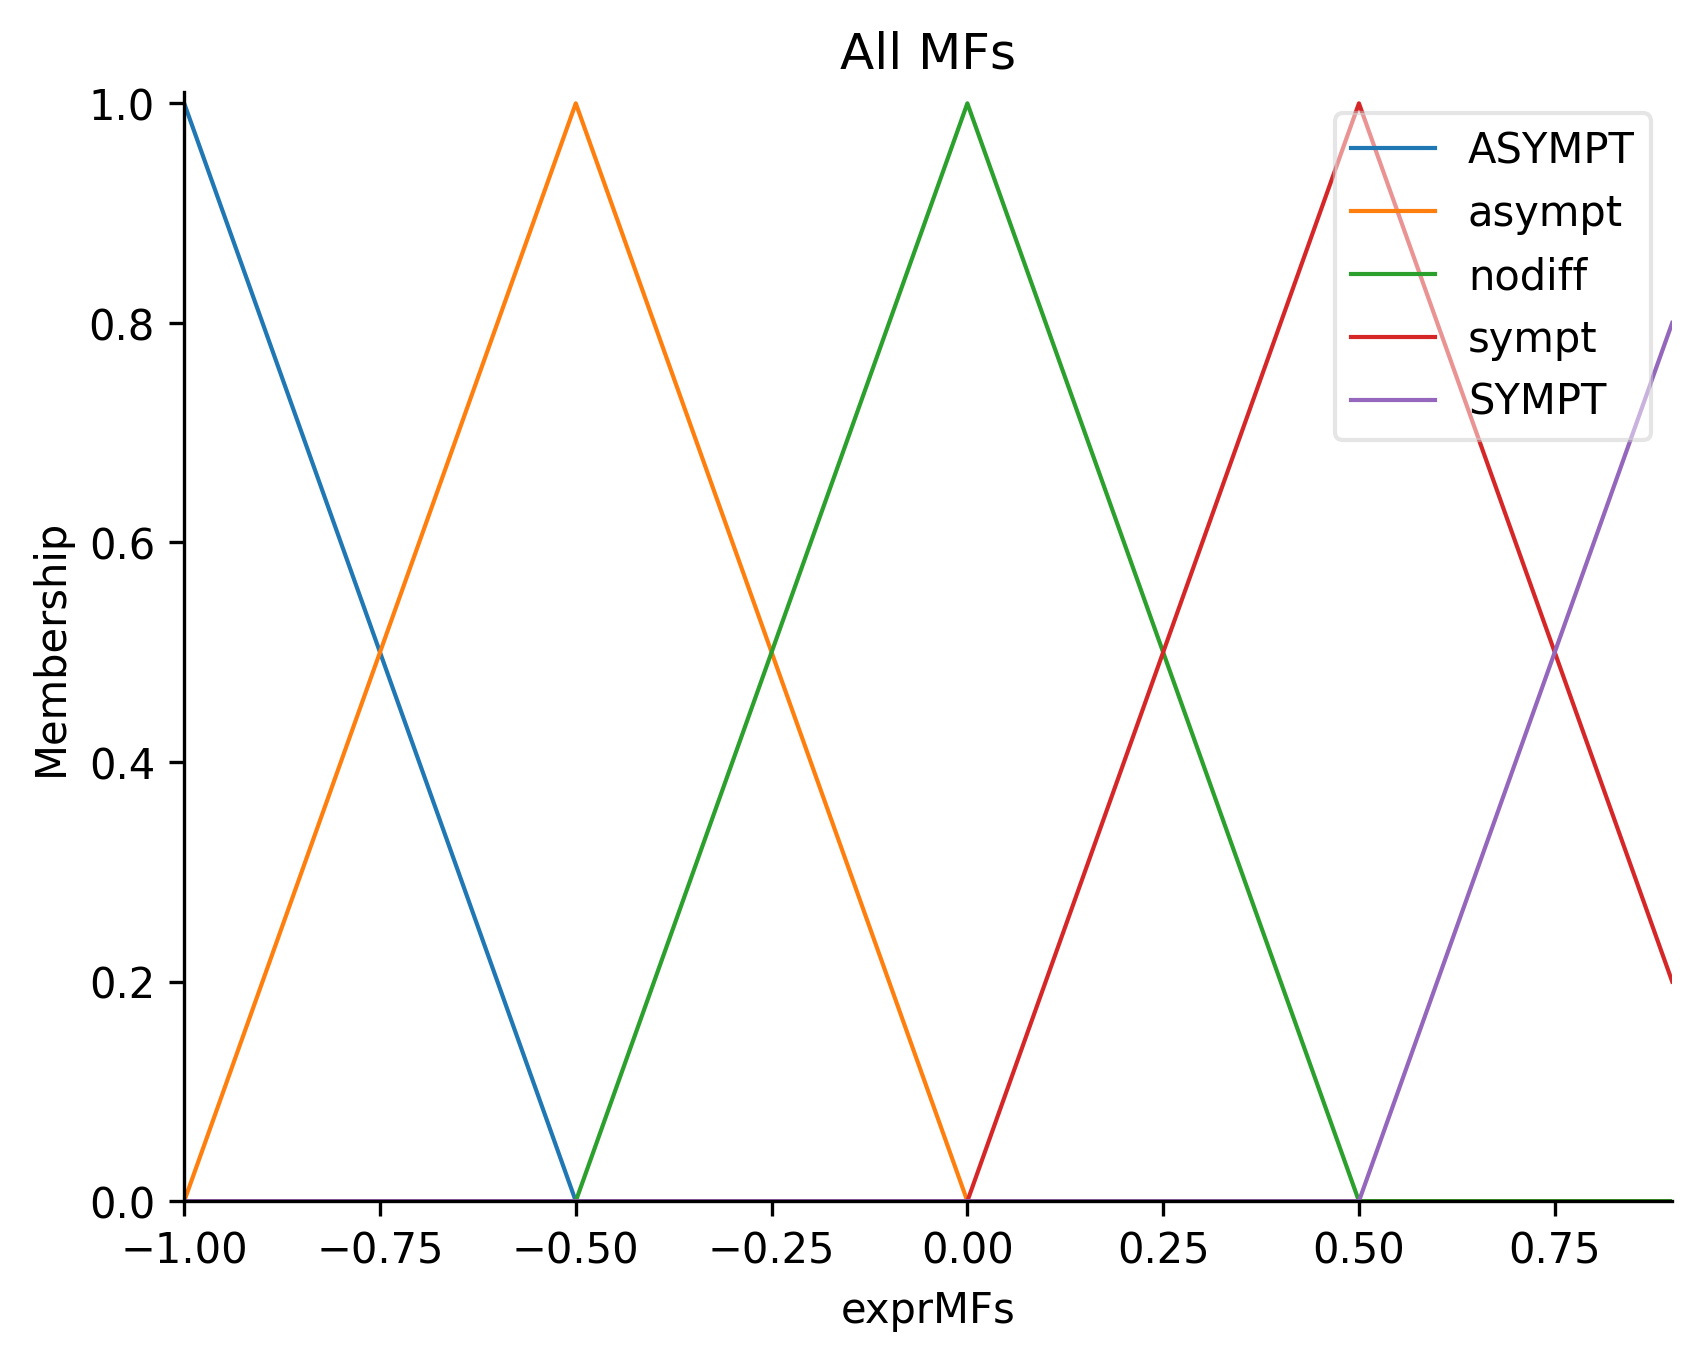

In [6]:
#explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"], meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True, shape="tri")
#explDF = FlowAnalysis.toFlowsDF(explDFRaw)

explDFWide, mfFuzzy = LegacyFuzzifier.fuzzify(exprData, stepsize=0.1, seriesOrder=["cluster.tp01","cluster.tp02","cluster.tp03"], mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"], centerMode="minmax",meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True) #"cluster.thrombus"
explDFWide

In [7]:
#pd.set_option("display.max_rows", 200, "display.max_columns", 15)

In [8]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [9]:
fa = FlowAnalysis(explDFWide, "gene", (  ("tp01", "TP 1"),("tp02", "TP 2"),("tp03", "TP 3")), mfFuzzy, sep=".cluster.") #("thrombus", "Thrombus"),

/mnt/raidbio/extproj/projekte/FlowSets/examples/../flowset.py:1640: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtickLabels)


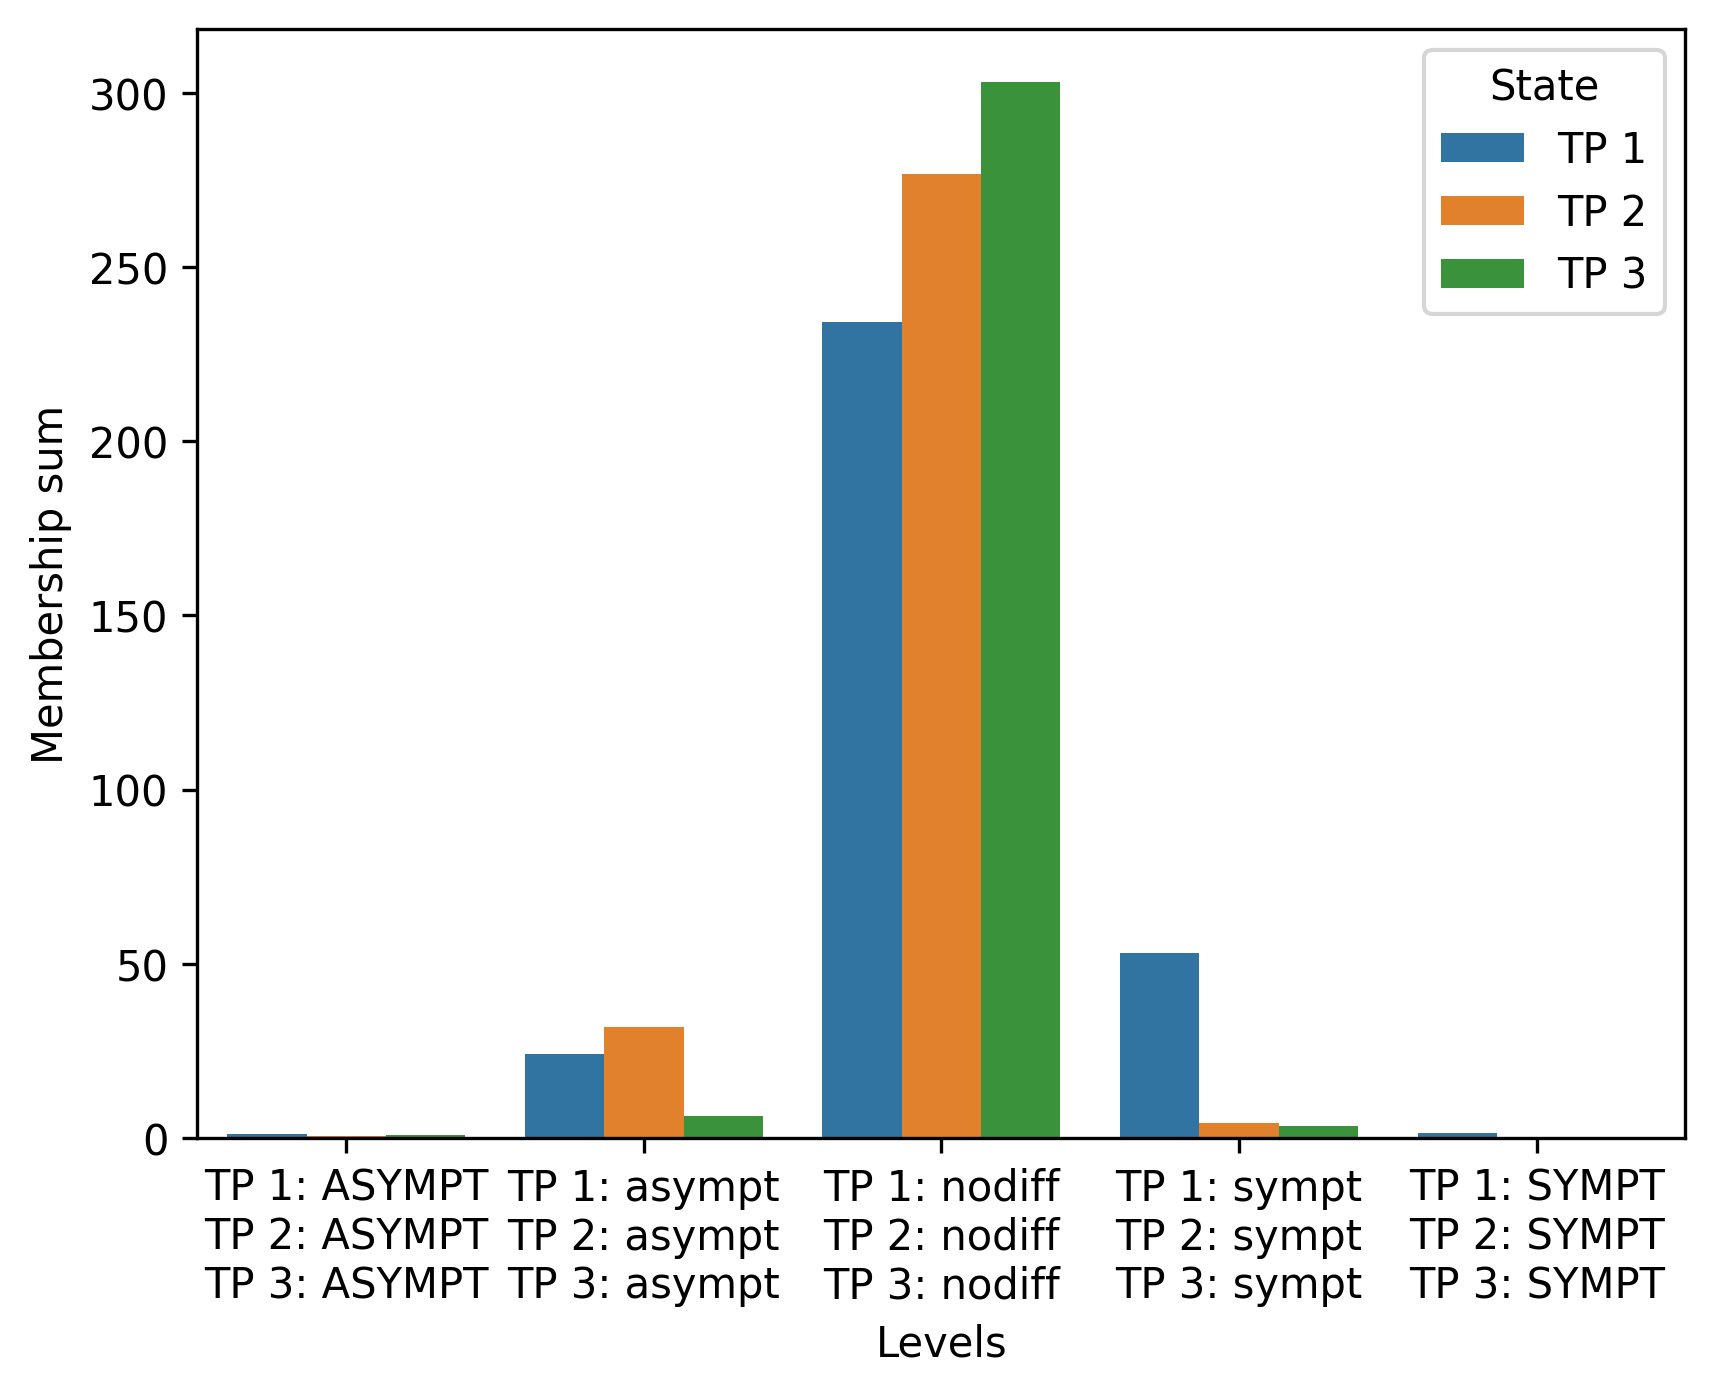

In [10]:
fa.hist_level_membershipsum()

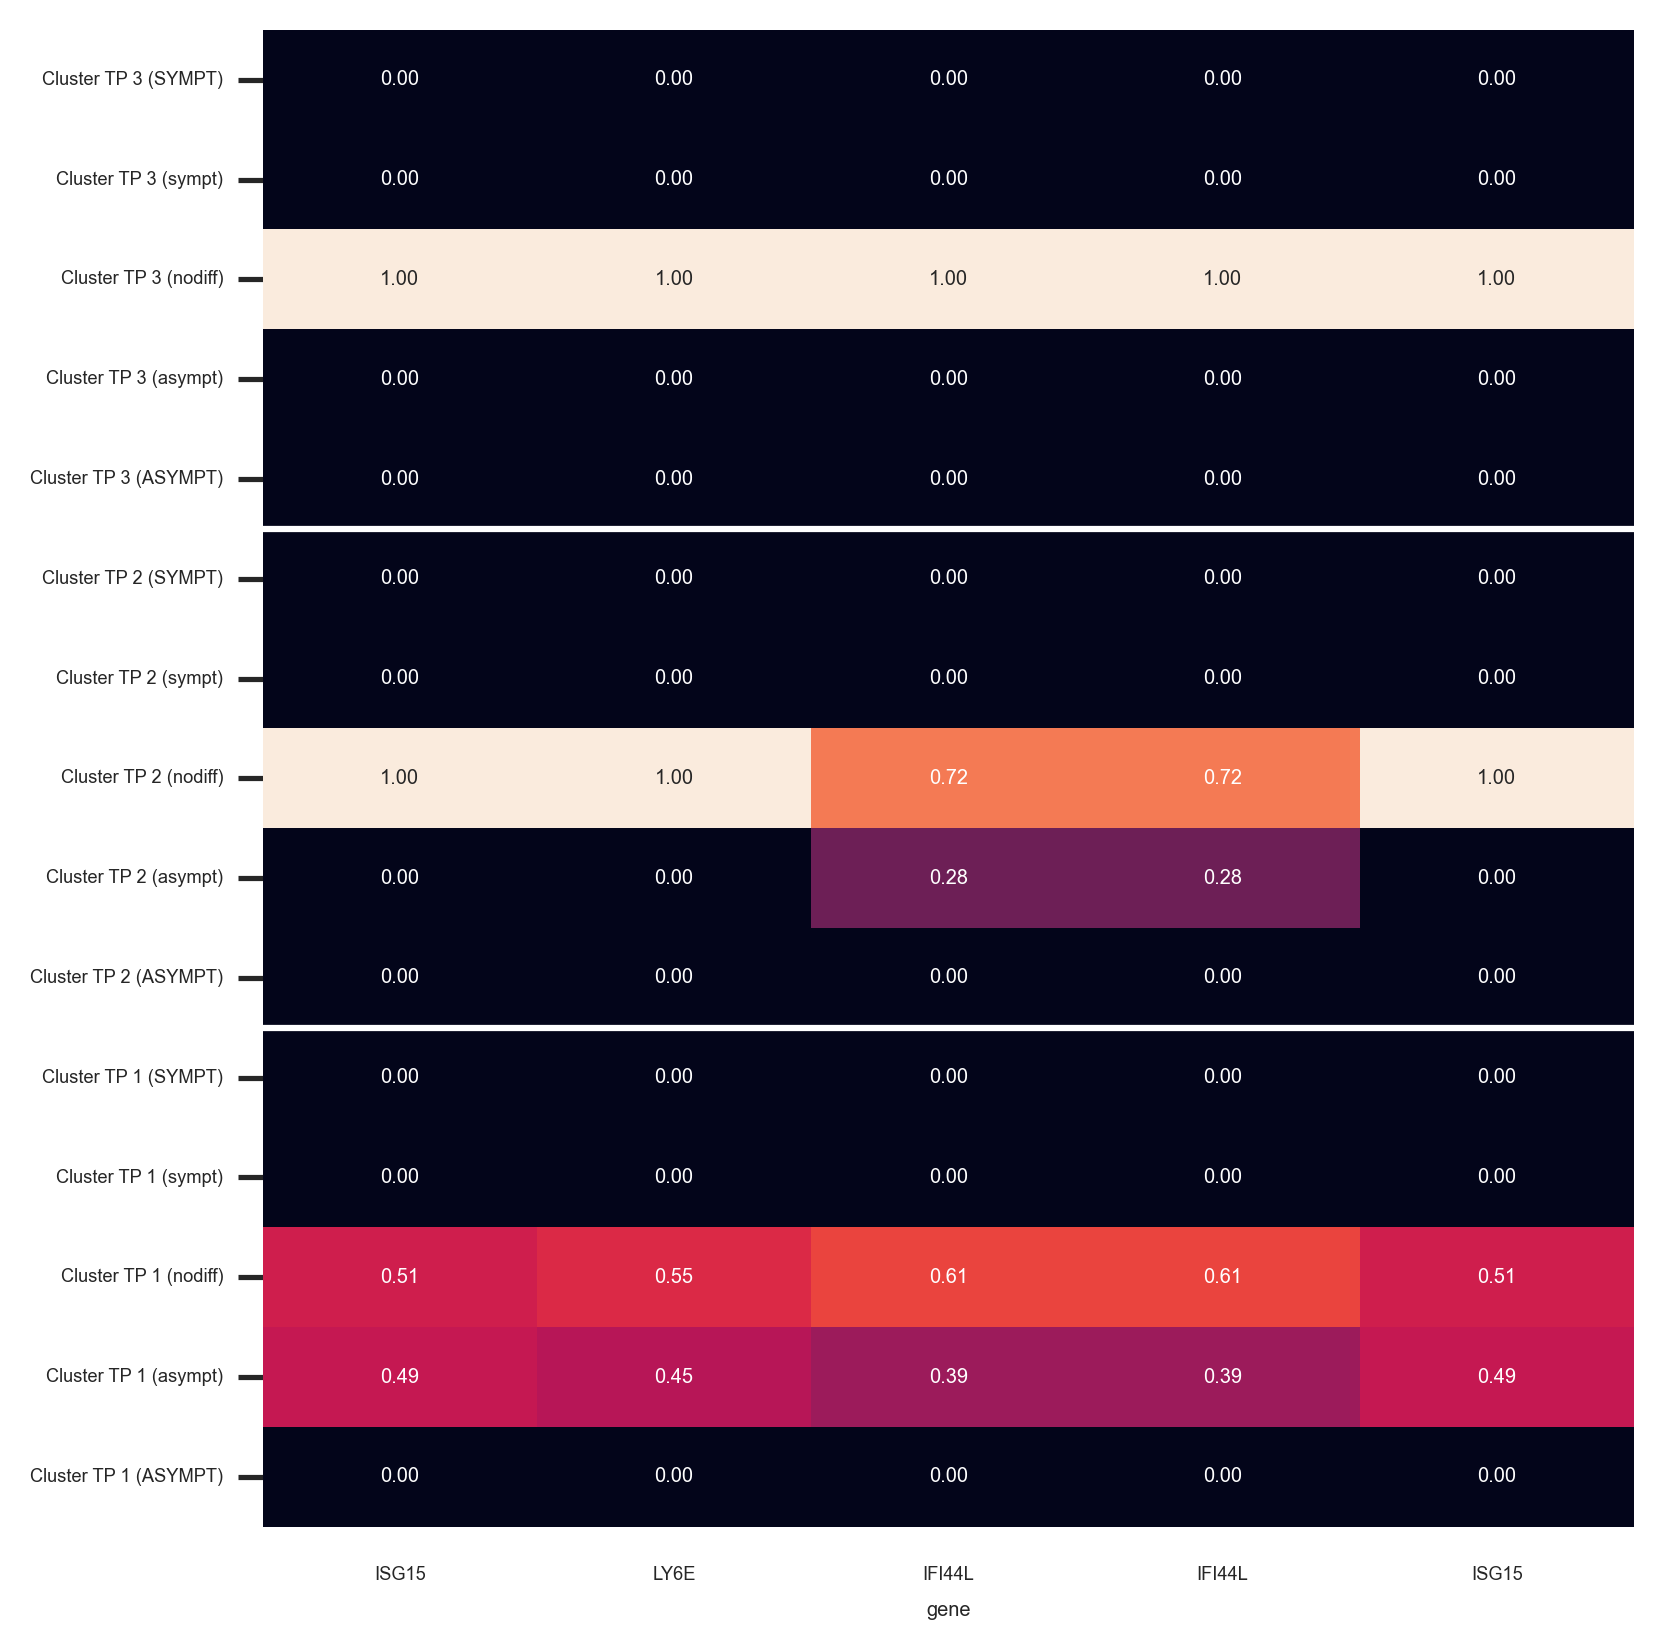

In [11]:
_=fa.plot_state_memberships(isgListShort, verbose=False)

In [12]:
import seaborn as sns

scm = fa._create_series_color_map(None, "scaling")
icefires = sns.color_palette("icefire", len(scm)+2)

sc = {x: scm[x](1.0) for xi, x in enumerate(scm)}
#sc = {x: icefires[xi+1] for xi, x in enumerate(scm)}
sc


{'TP 1': (np.float64(0.267004),
  np.float64(0.004874),
  np.float64(0.329415),
  np.float64(1.0)),
 'TP 2': (np.float64(0.190631),
  np.float64(0.407061),
  np.float64(0.556089),
  np.float64(1.0)),
 'TP 3': (np.float64(0.20803),
  np.float64(0.718701),
  np.float64(0.472873),
  np.float64(1.0))}

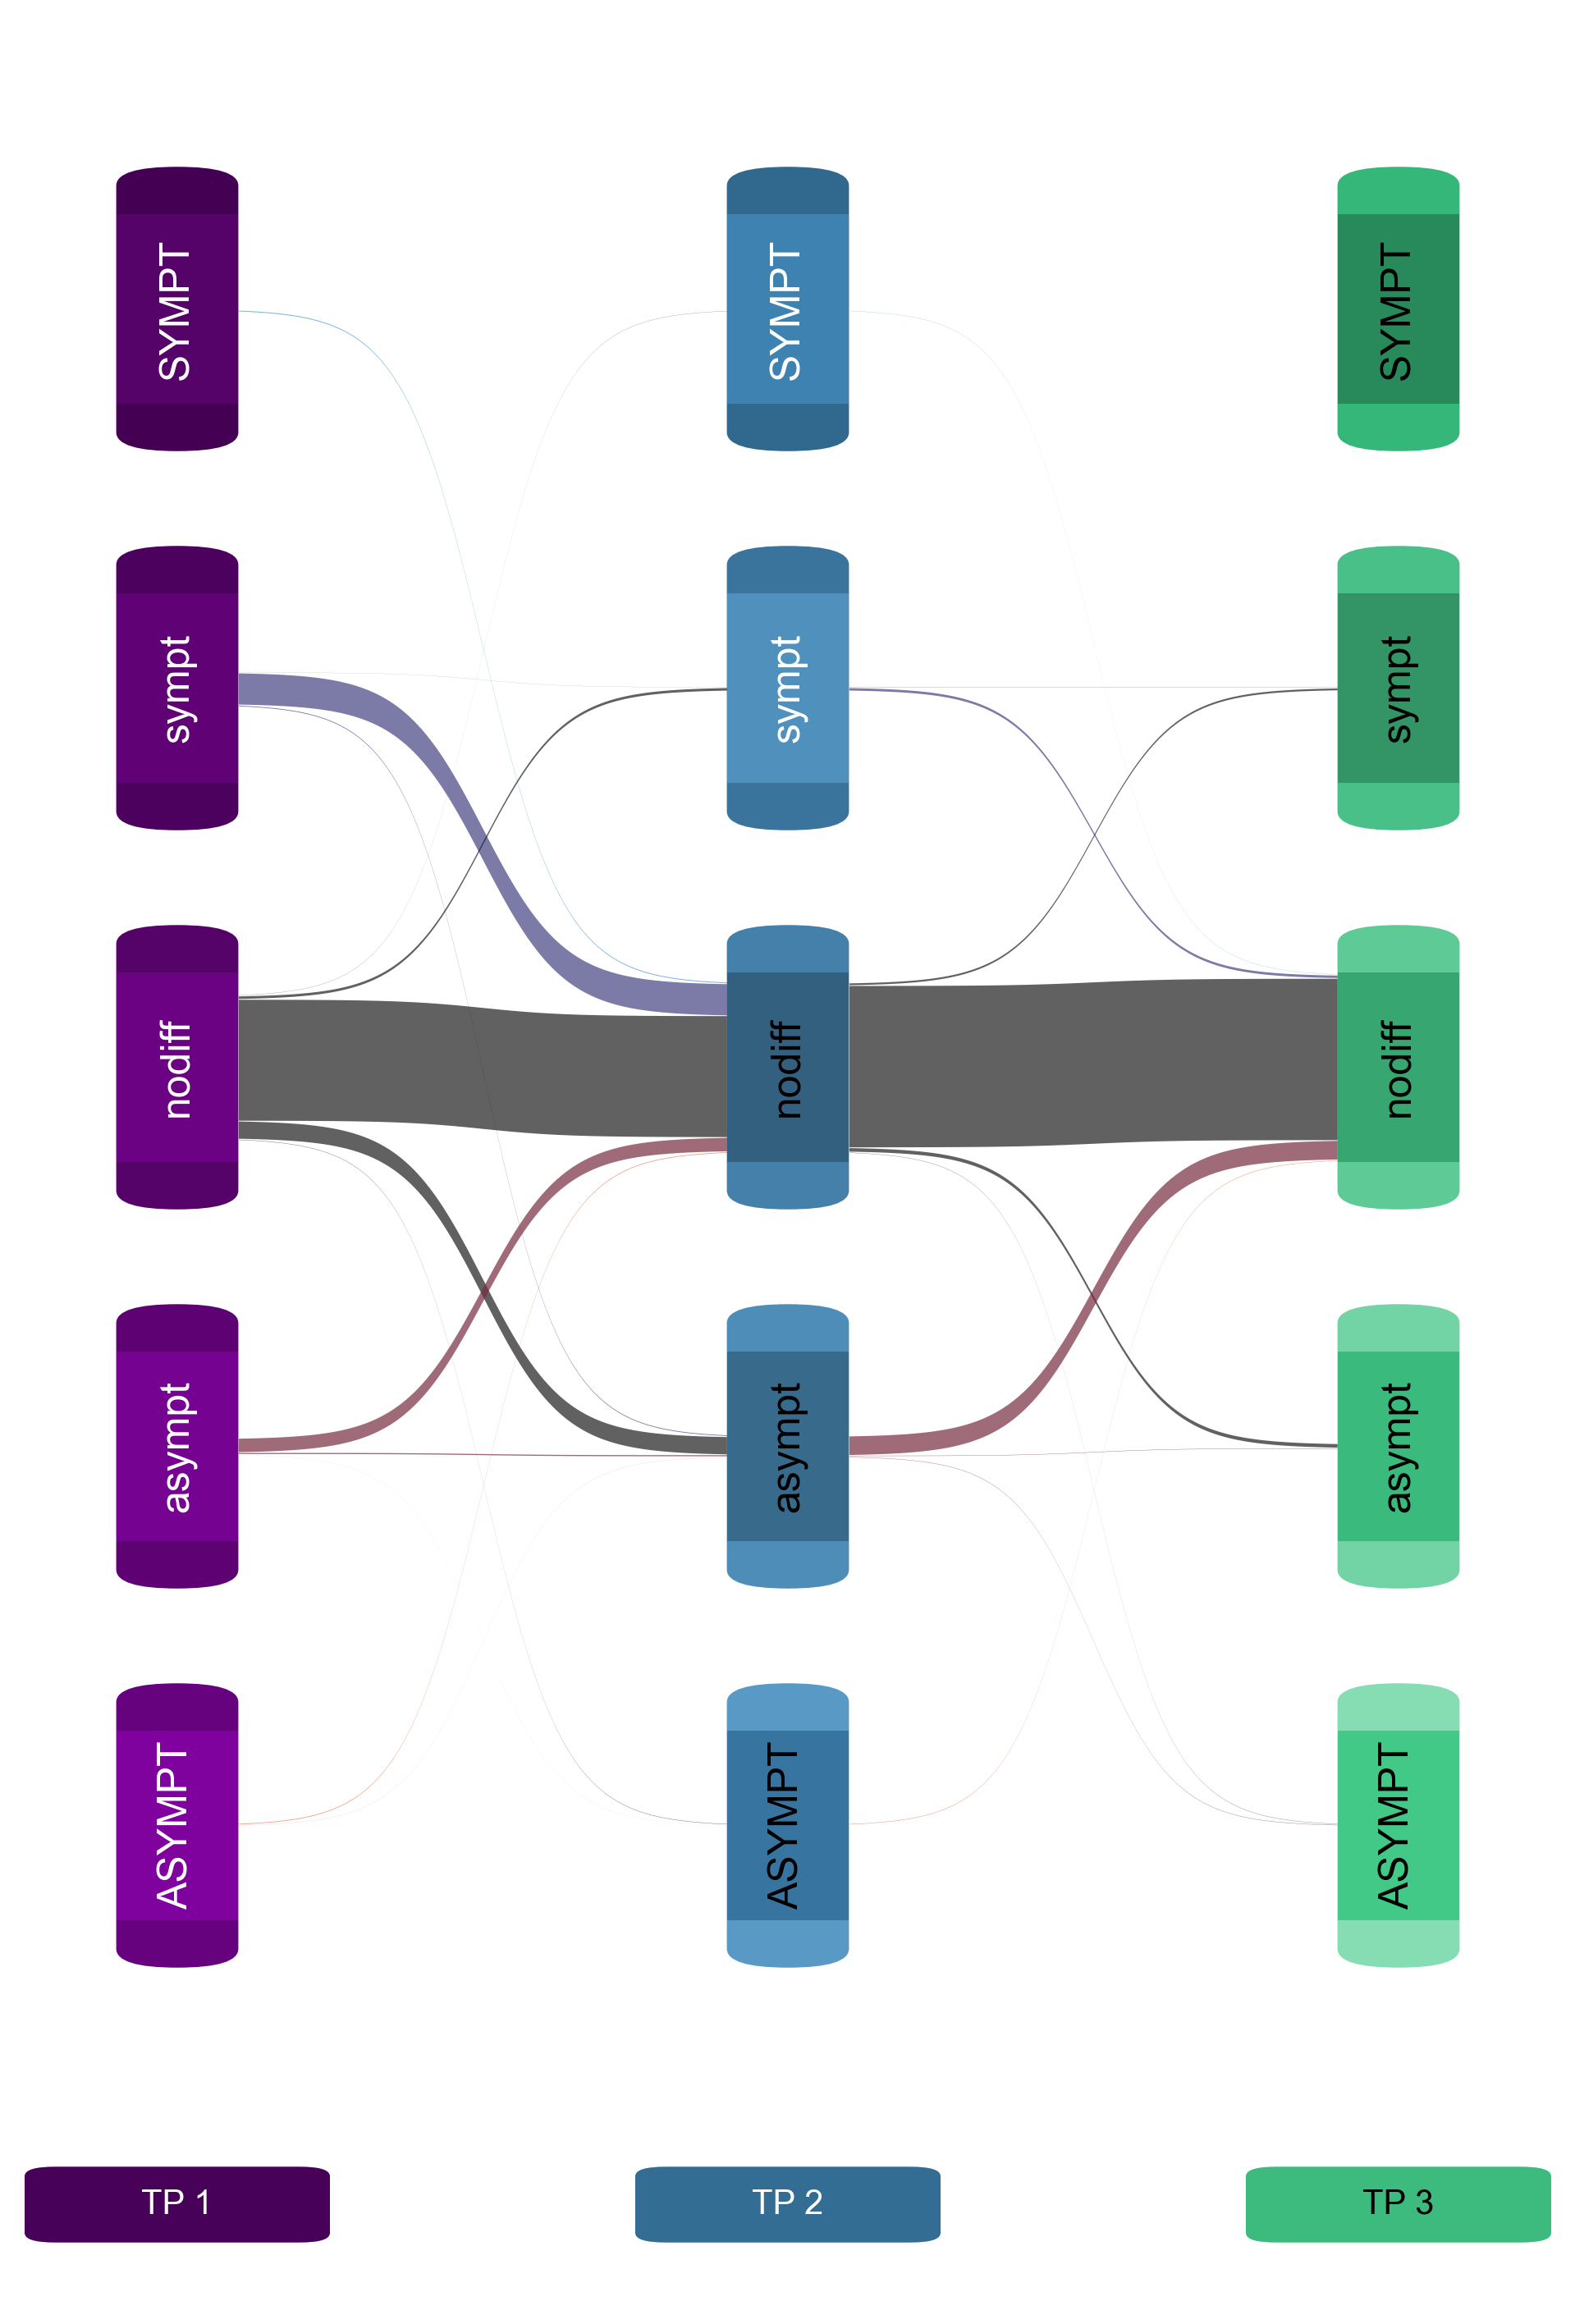

In [13]:
fa.plot_flows(verbose=False, seriesColors=sc, figsize=(8,12), outfile="plots/ddiff_flows_all")

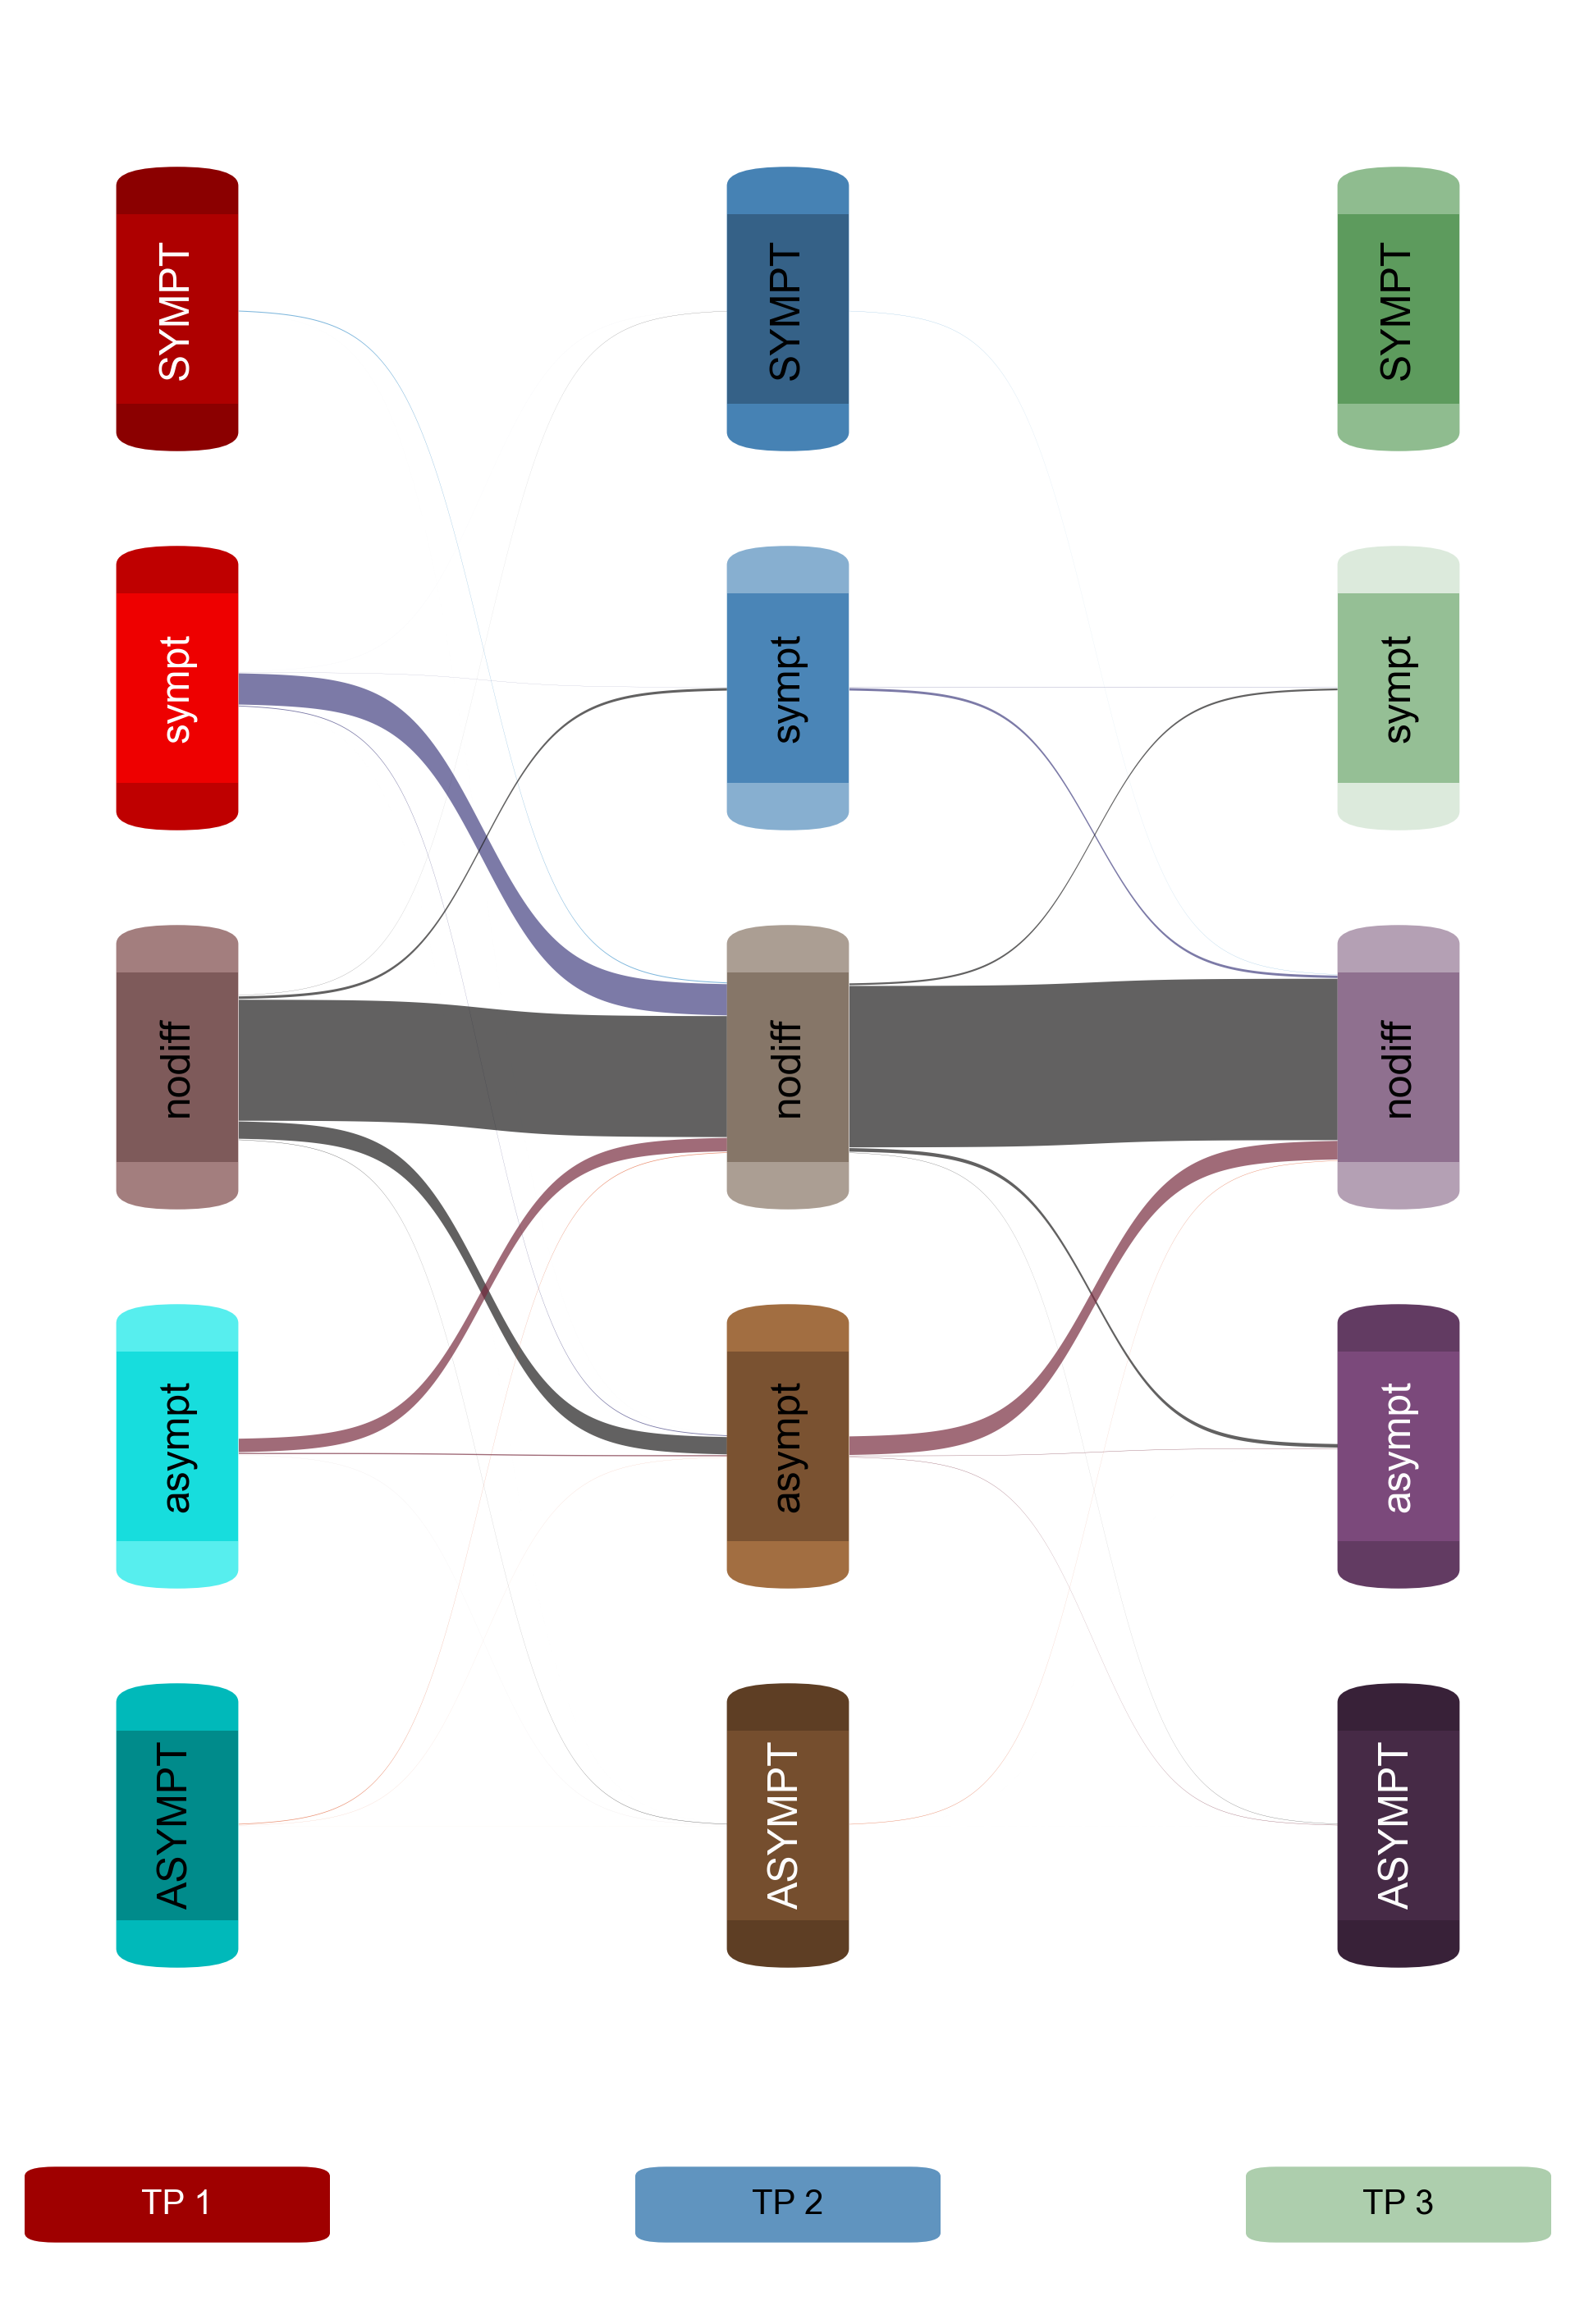

In [14]:
fa.plot_flows(figsize=(8,12), verbose=False, seriesColors={"TP 1": "darkred", "TP 2": "steelblue", "TP 3": "darkseagreen"}, colorMode="diverging", outfile="plots/ddiff_flows_all_diverging_manual")

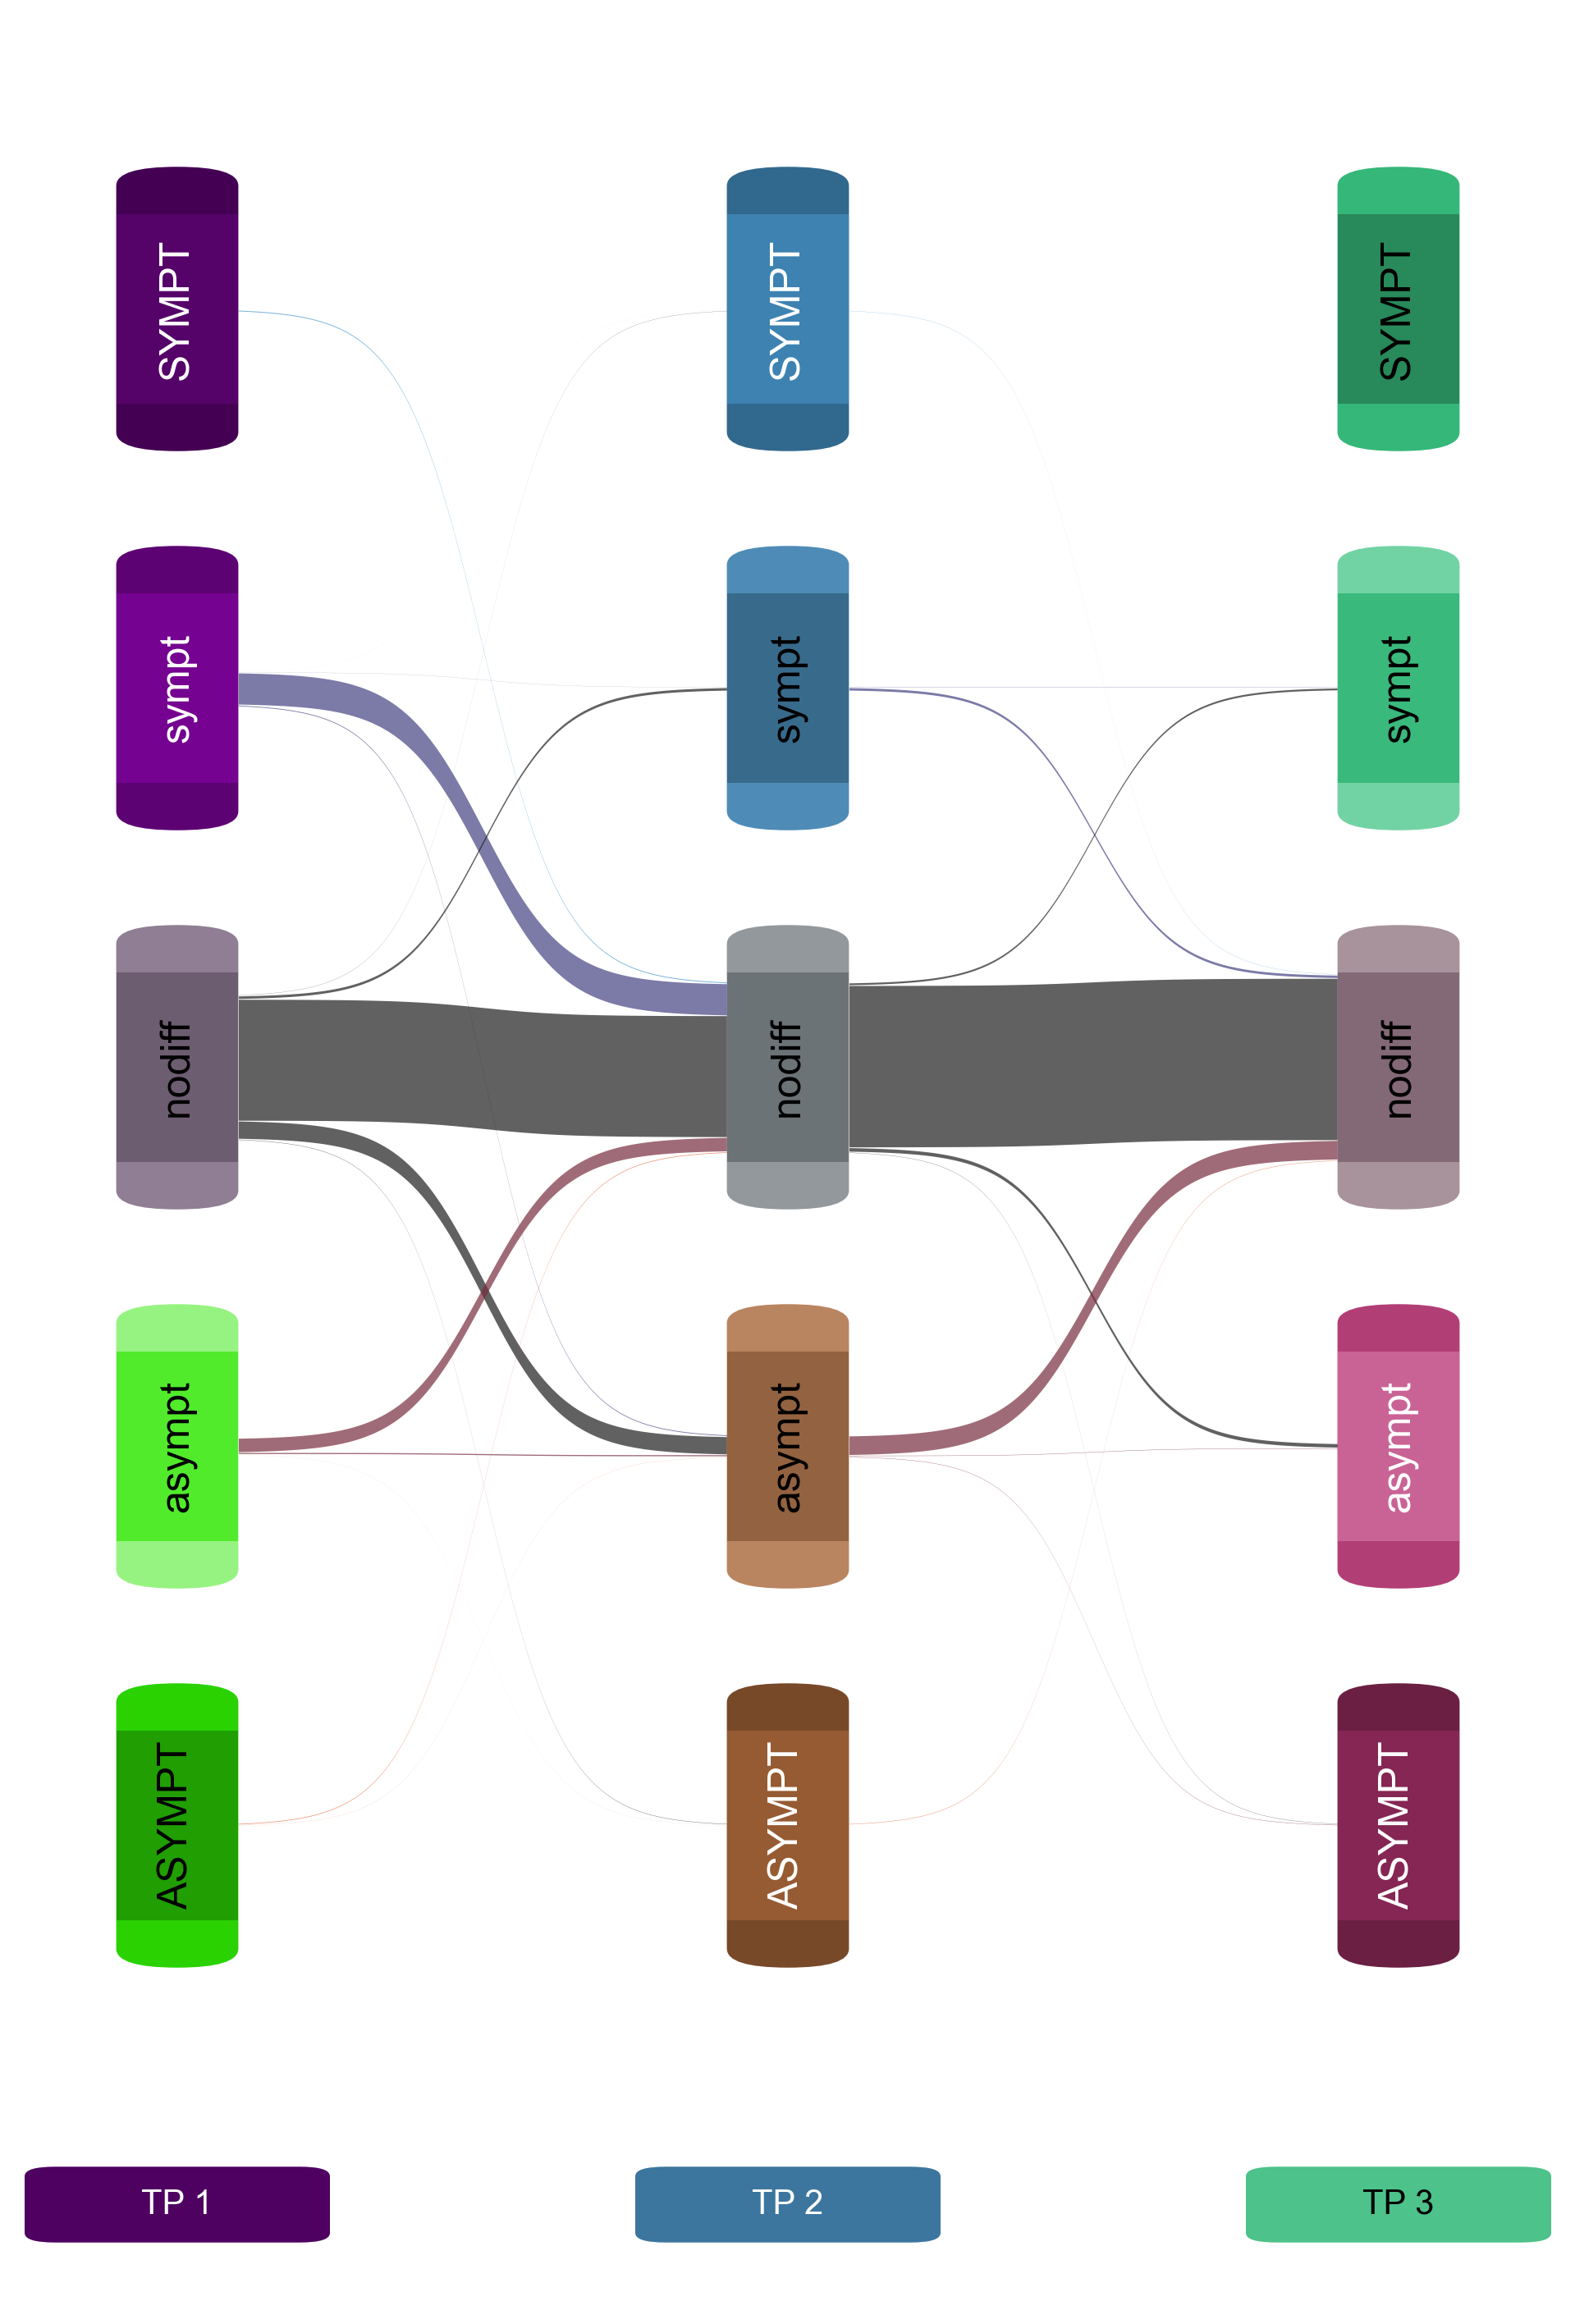

In [15]:
fa.plot_flows(figsize=(8,12), verbose=False, seriesColors=sc, colorMode="diverging", outfile="plots/ddiff_flows_all_diverging")

In [16]:
relEdgesAsympt = fa.flow_finder(["<", "<="], maxLevels=["asympt", None, None], verbose=True)
print(relEdgesAsympt)

15 (('tp01', 'asympt'), ('tp02', 'SYMPT'))
16 (('tp01', 'asympt'), ('tp02', 'sympt'))
17 (('tp01', 'asympt'), ('tp02', 'nodiff'))
20 (('tp01', 'ASYMPT'), ('tp02', 'SYMPT'))
21 (('tp01', 'ASYMPT'), ('tp02', 'sympt'))
22 (('tp01', 'ASYMPT'), ('tp02', 'nodiff'))
23 (('tp01', 'ASYMPT'), ('tp02', 'asympt'))
25 (('tp02', 'SYMPT'), ('tp03', 'SYMPT'))
30 (('tp02', 'sympt'), ('tp03', 'SYMPT'))
31 (('tp02', 'sympt'), ('tp03', 'sympt'))
35 (('tp02', 'nodiff'), ('tp03', 'SYMPT'))
36 (('tp02', 'nodiff'), ('tp03', 'sympt'))
37 (('tp02', 'nodiff'), ('tp03', 'nodiff'))
40 (('tp02', 'asympt'), ('tp03', 'SYMPT'))
41 (('tp02', 'asympt'), ('tp03', 'sympt'))
42 (('tp02', 'asympt'), ('tp03', 'nodiff'))
43 (('tp02', 'asympt'), ('tp03', 'asympt'))
45 (('tp02', 'ASYMPT'), ('tp03', 'SYMPT'))
46 (('tp02', 'ASYMPT'), ('tp03', 'sympt'))
47 (('tp02', 'ASYMPT'), ('tp03', 'nodiff'))
48 (('tp02', 'ASYMPT'), ('tp03', 'asympt'))
49 (('tp02', 'ASYMPT'), ('tp03', 'ASYMPT'))
{15, 16, 17, 20, 21, 22, 23, 25, 30, 31, 35, 36,

In [17]:
relEdgesSympt = fa.flow_finder([">", ">="], minLevels=["sympt", None, None], verbose=True)
print(relEdgesSympt)

1 (('tp01', 'SYMPT'), ('tp02', 'sympt'))
2 (('tp01', 'SYMPT'), ('tp02', 'nodiff'))
3 (('tp01', 'SYMPT'), ('tp02', 'asympt'))
4 (('tp01', 'SYMPT'), ('tp02', 'ASYMPT'))
7 (('tp01', 'sympt'), ('tp02', 'nodiff'))
8 (('tp01', 'sympt'), ('tp02', 'asympt'))
9 (('tp01', 'sympt'), ('tp02', 'ASYMPT'))
25 (('tp02', 'SYMPT'), ('tp03', 'SYMPT'))
26 (('tp02', 'SYMPT'), ('tp03', 'sympt'))
27 (('tp02', 'SYMPT'), ('tp03', 'nodiff'))
28 (('tp02', 'SYMPT'), ('tp03', 'asympt'))
29 (('tp02', 'SYMPT'), ('tp03', 'ASYMPT'))
31 (('tp02', 'sympt'), ('tp03', 'sympt'))
32 (('tp02', 'sympt'), ('tp03', 'nodiff'))
33 (('tp02', 'sympt'), ('tp03', 'asympt'))
34 (('tp02', 'sympt'), ('tp03', 'ASYMPT'))
37 (('tp02', 'nodiff'), ('tp03', 'nodiff'))
38 (('tp02', 'nodiff'), ('tp03', 'asympt'))
39 (('tp02', 'nodiff'), ('tp03', 'ASYMPT'))
43 (('tp02', 'asympt'), ('tp03', 'asympt'))
44 (('tp02', 'asympt'), ('tp03', 'ASYMPT'))
49 (('tp02', 'ASYMPT'), ('tp03', 'ASYMPT'))
{1, 2, 3, 4, 7, 8, 9, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3

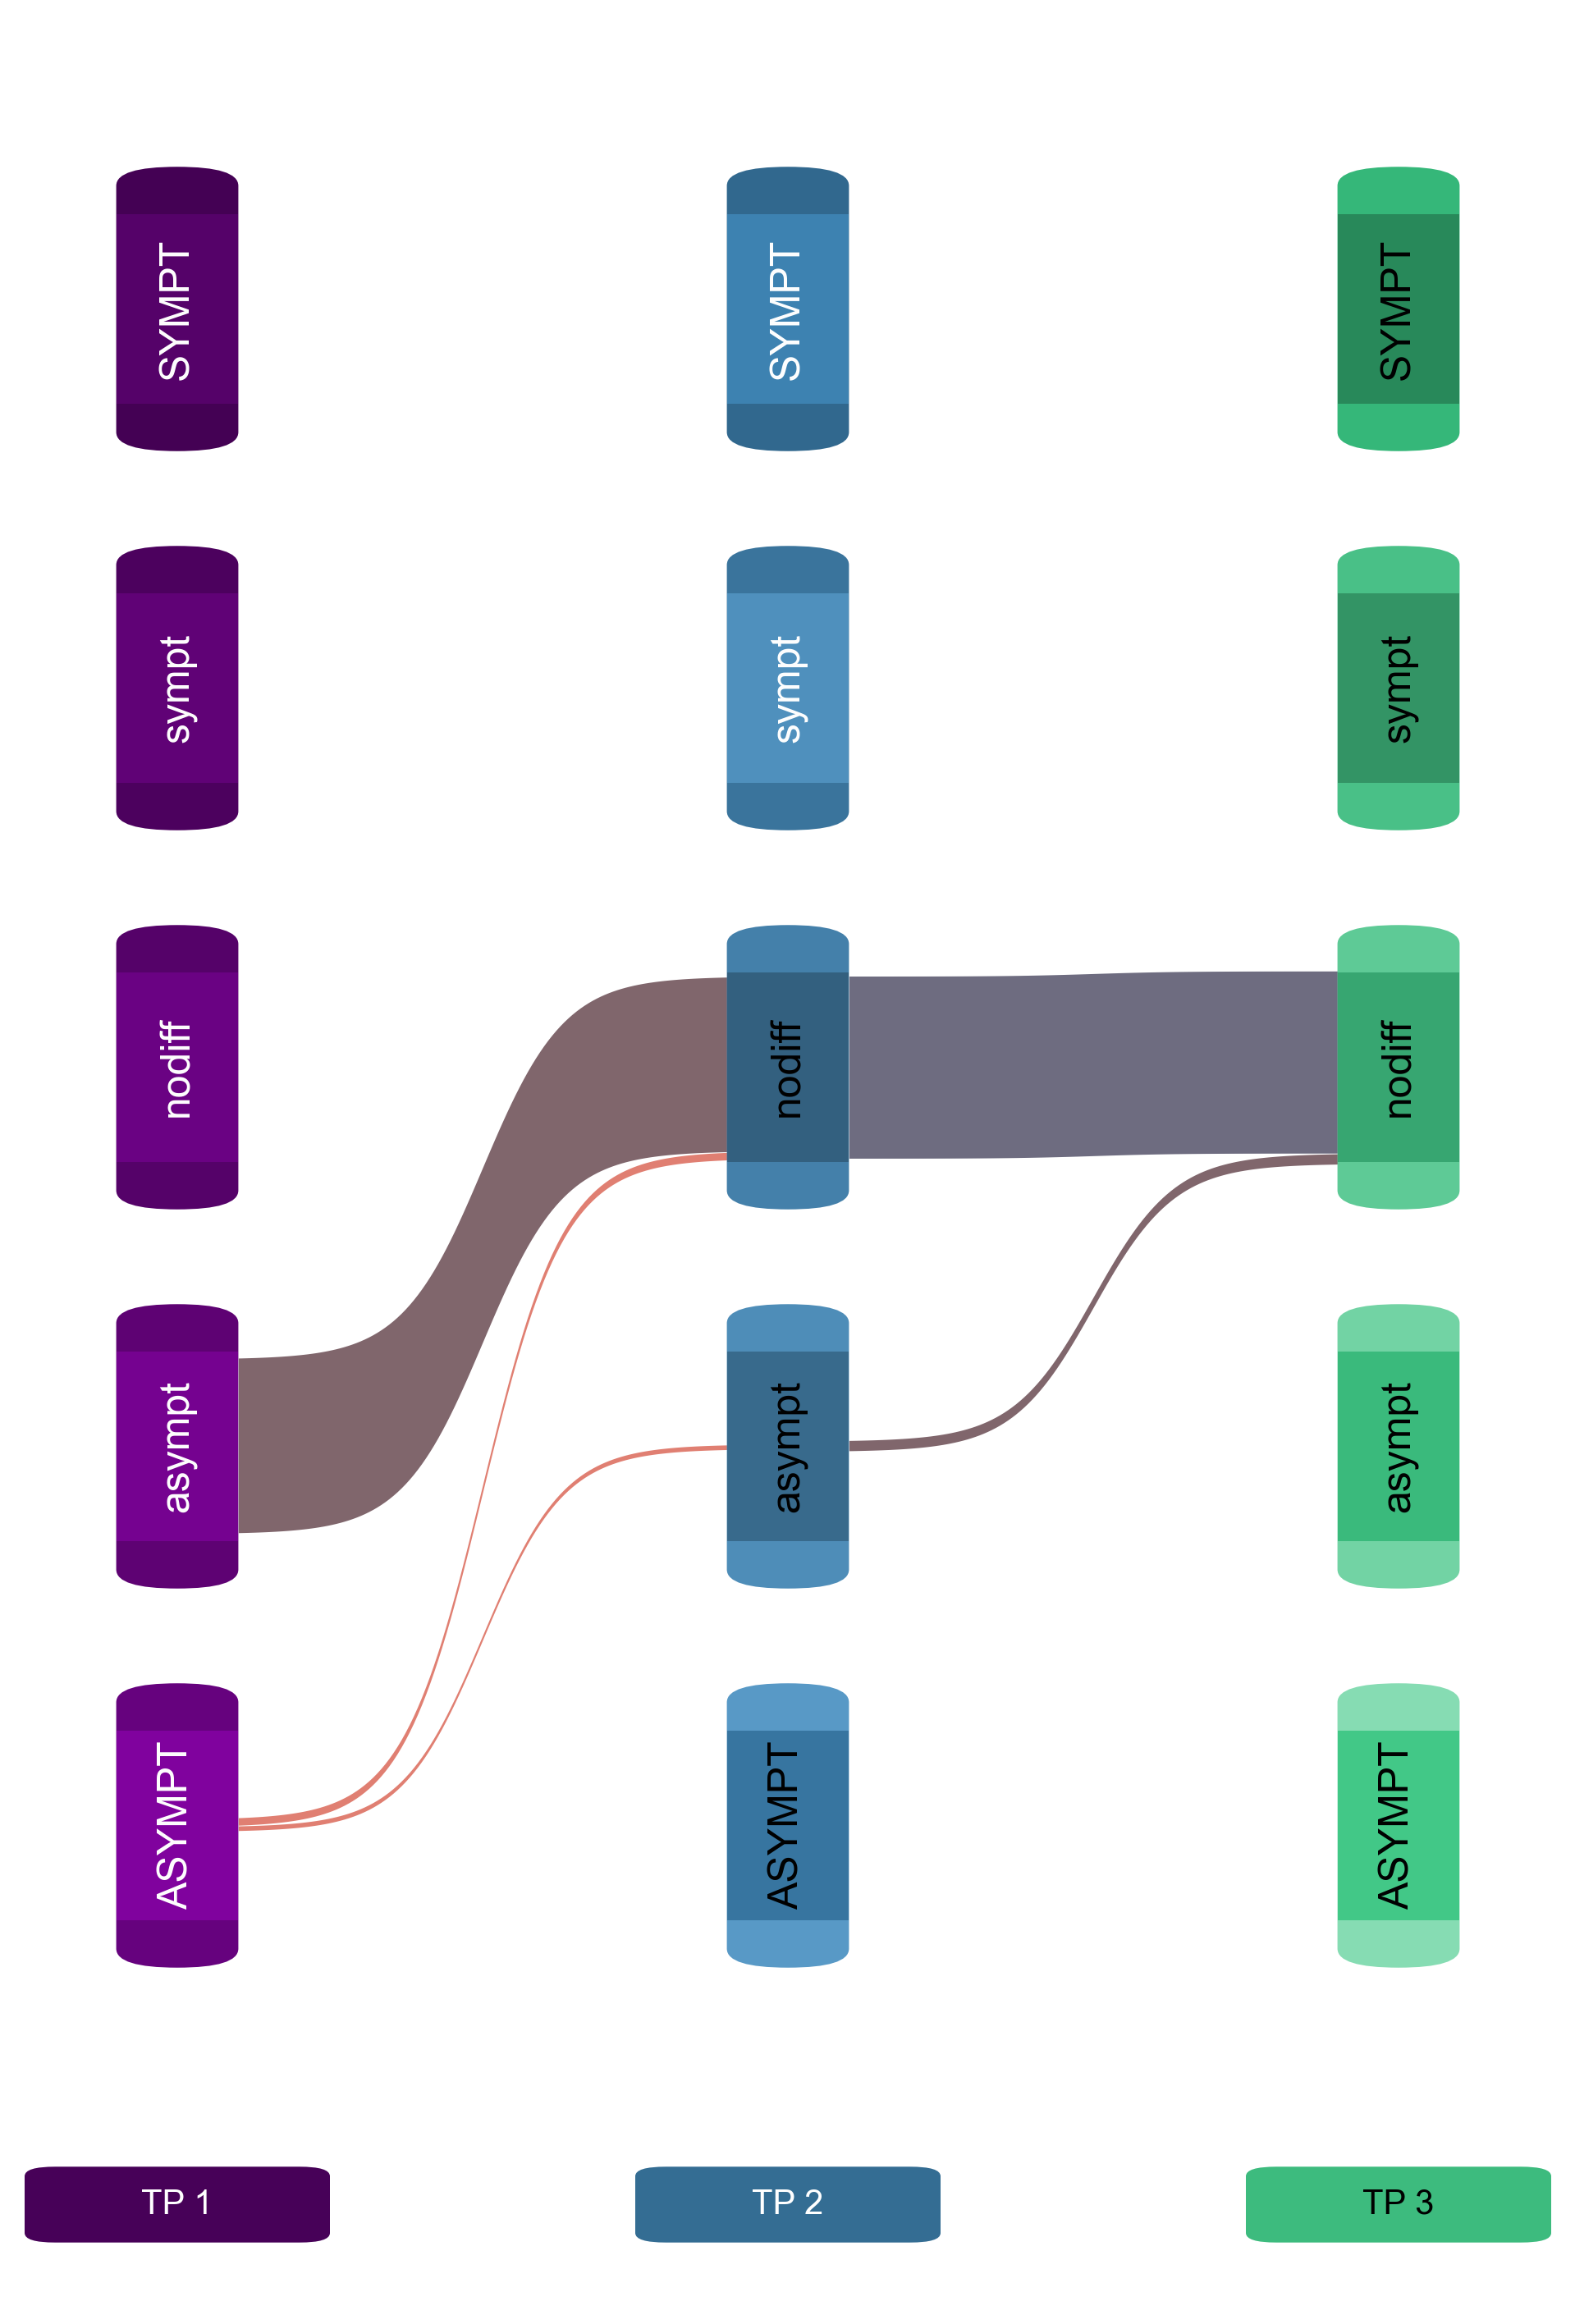

In [18]:
fa.plot_flows(use_edges=relEdgesAsympt, seriesColors=sc, figsize=(8,12), outfile="plots/ddiff_flows_asympt")

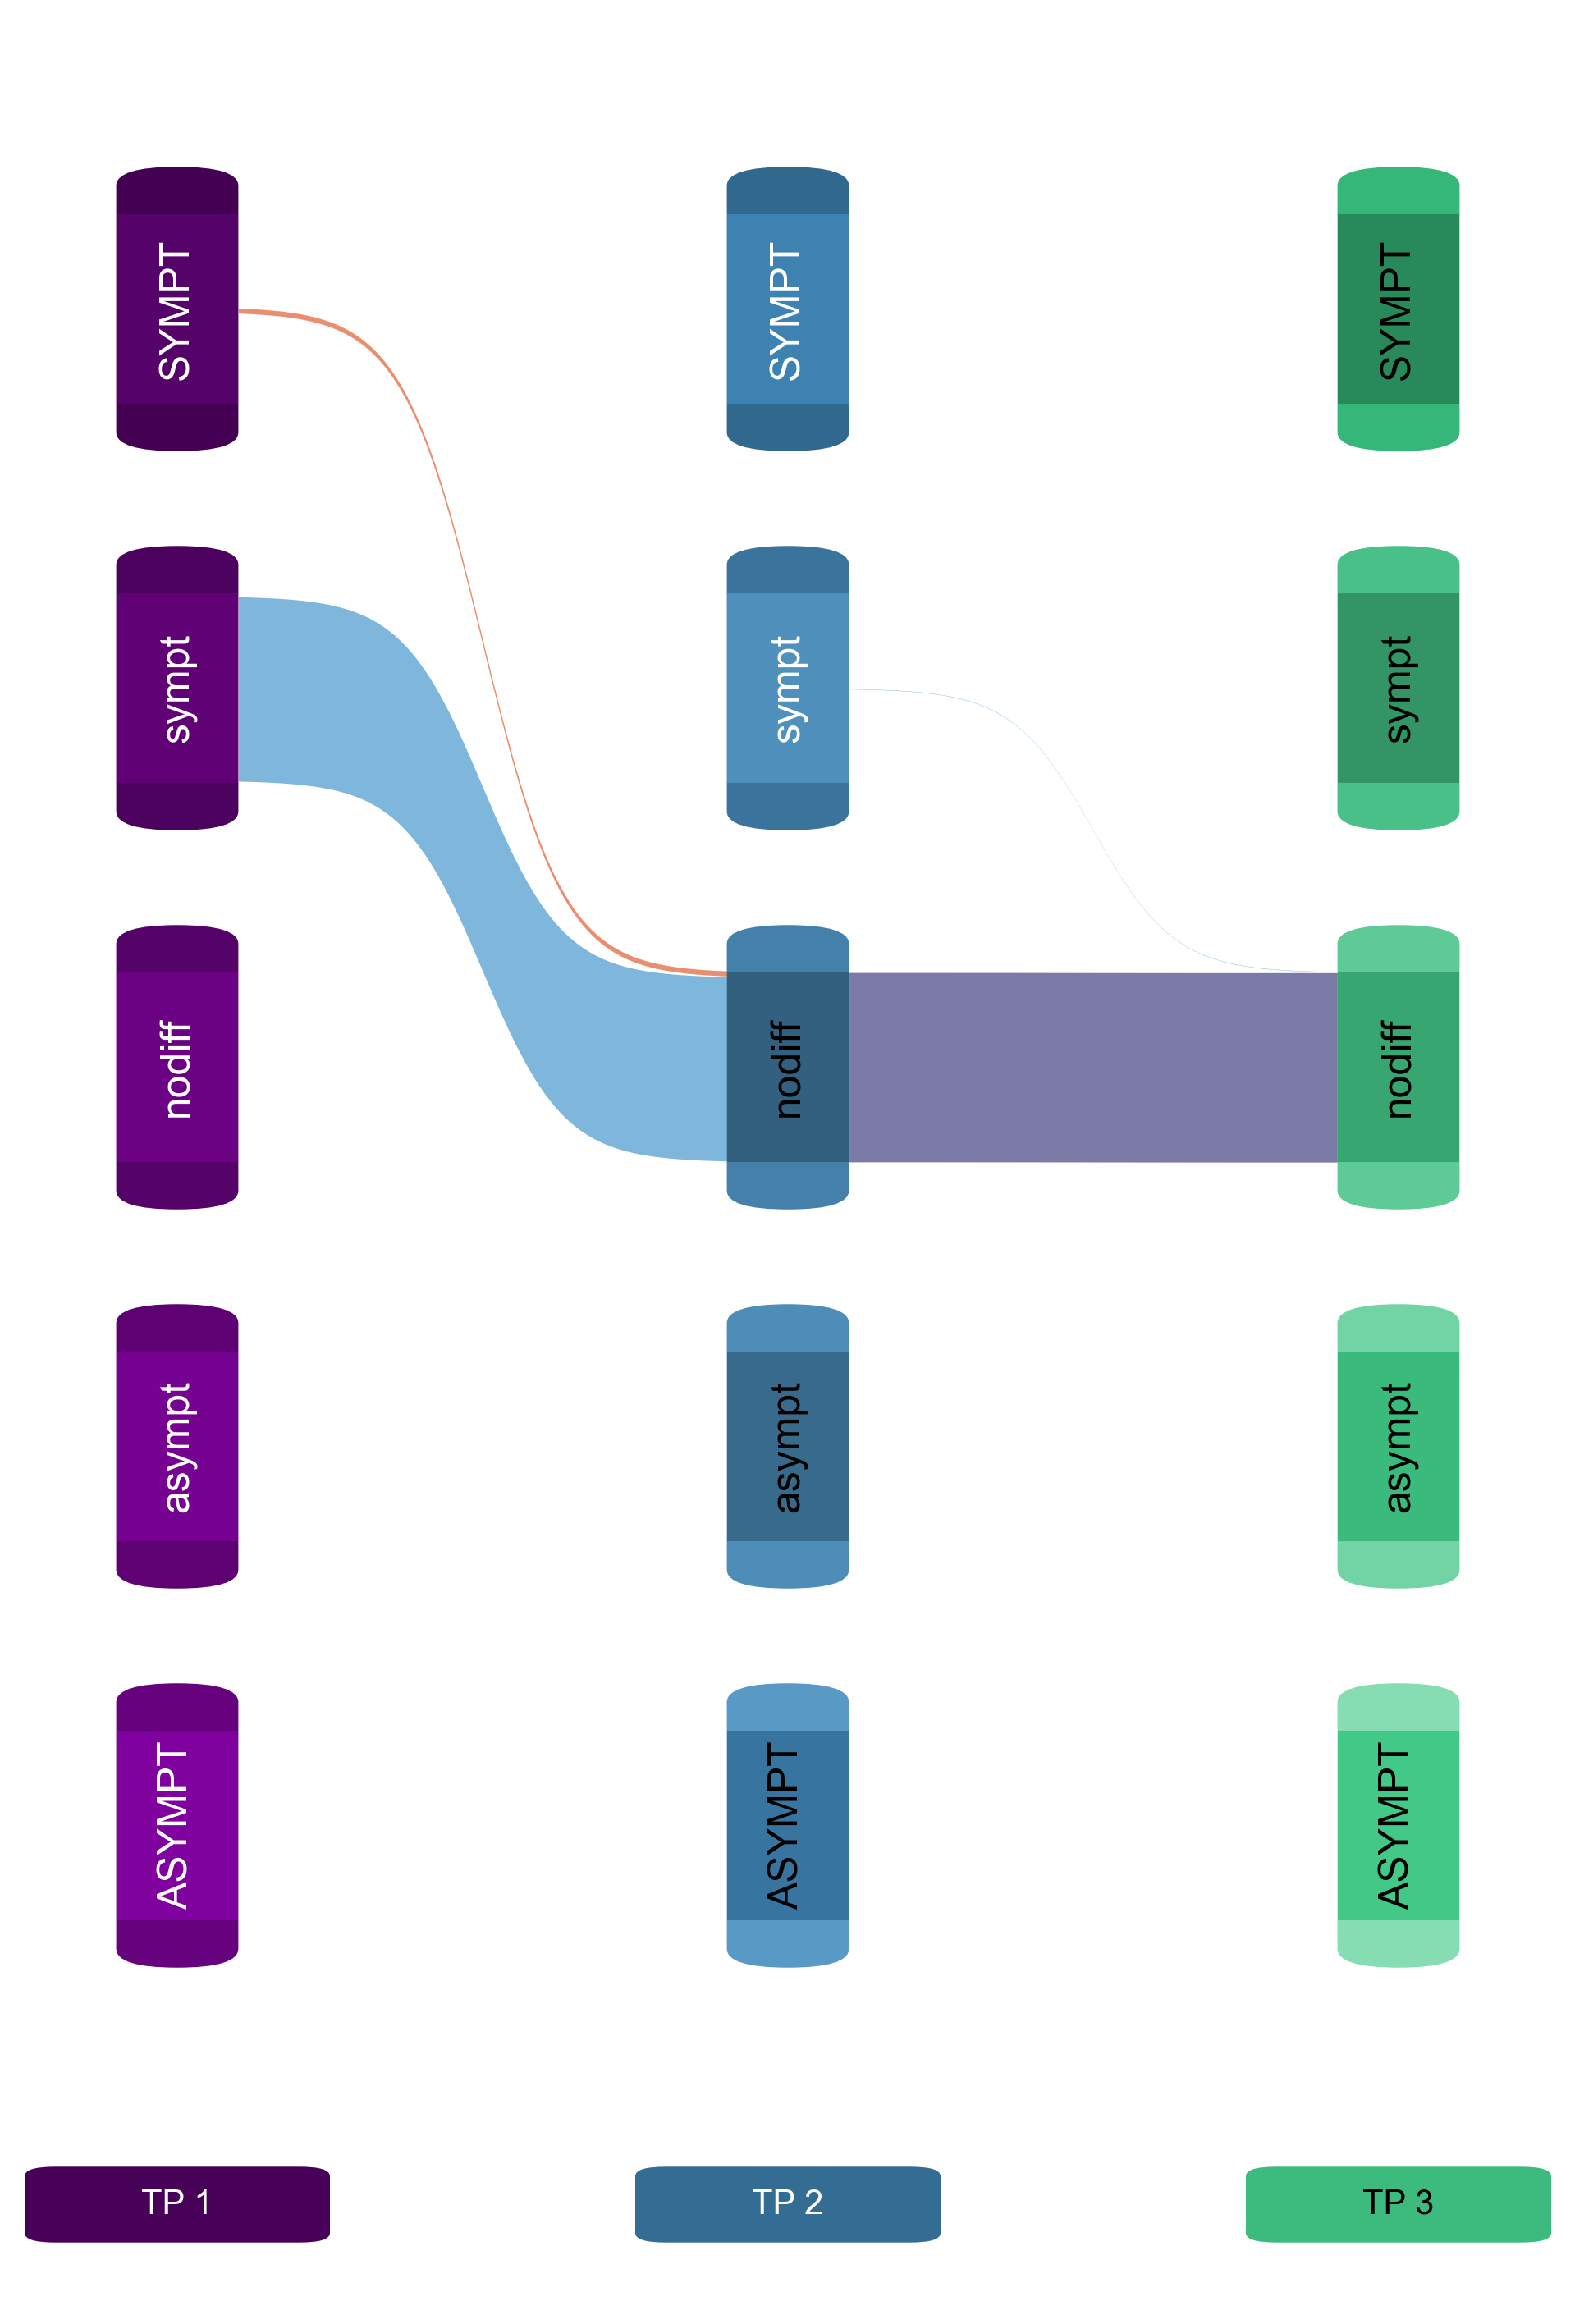

In [19]:
fa.plot_flows(use_edges=relEdgesSympt, seriesColors=sc, figsize=(8,12), outfile="plots/ddiff_flows_sympt")

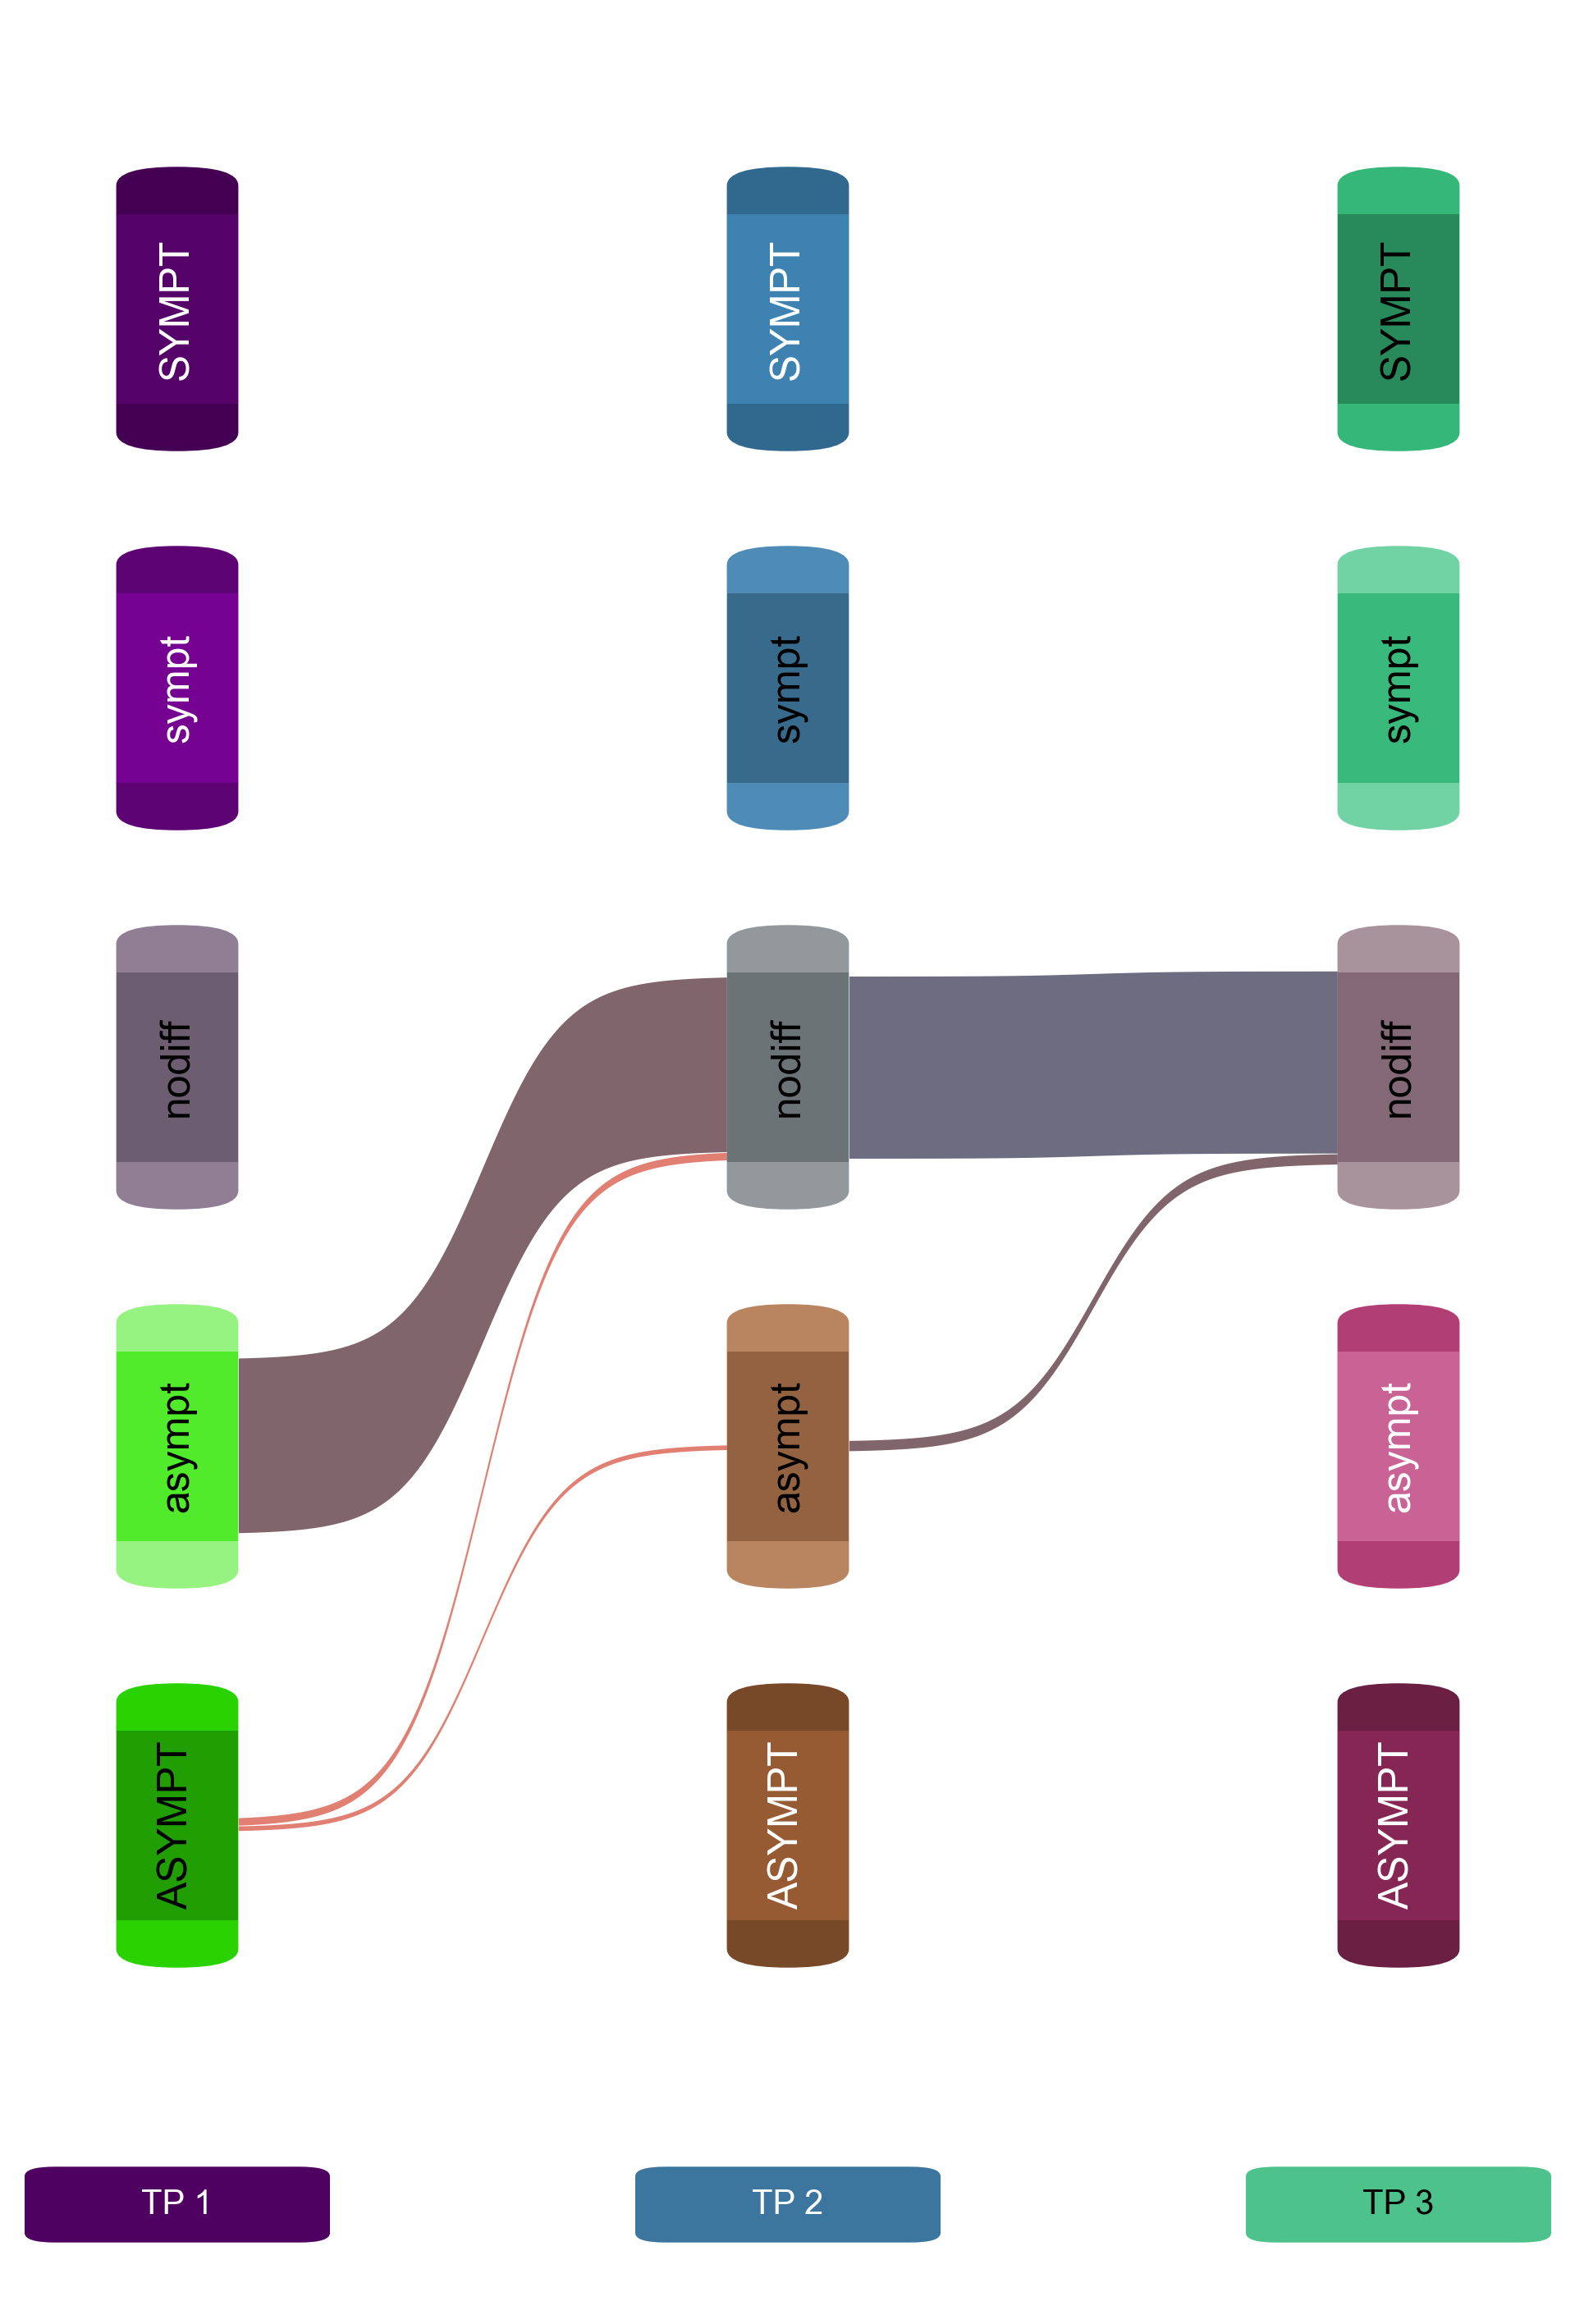

In [20]:
fa.plot_flows(use_edges=relEdgesAsympt, seriesColors=sc, figsize=(8,12), outfile="plots/ddiff_flows_asympt_diverging", colorMode="diverging")

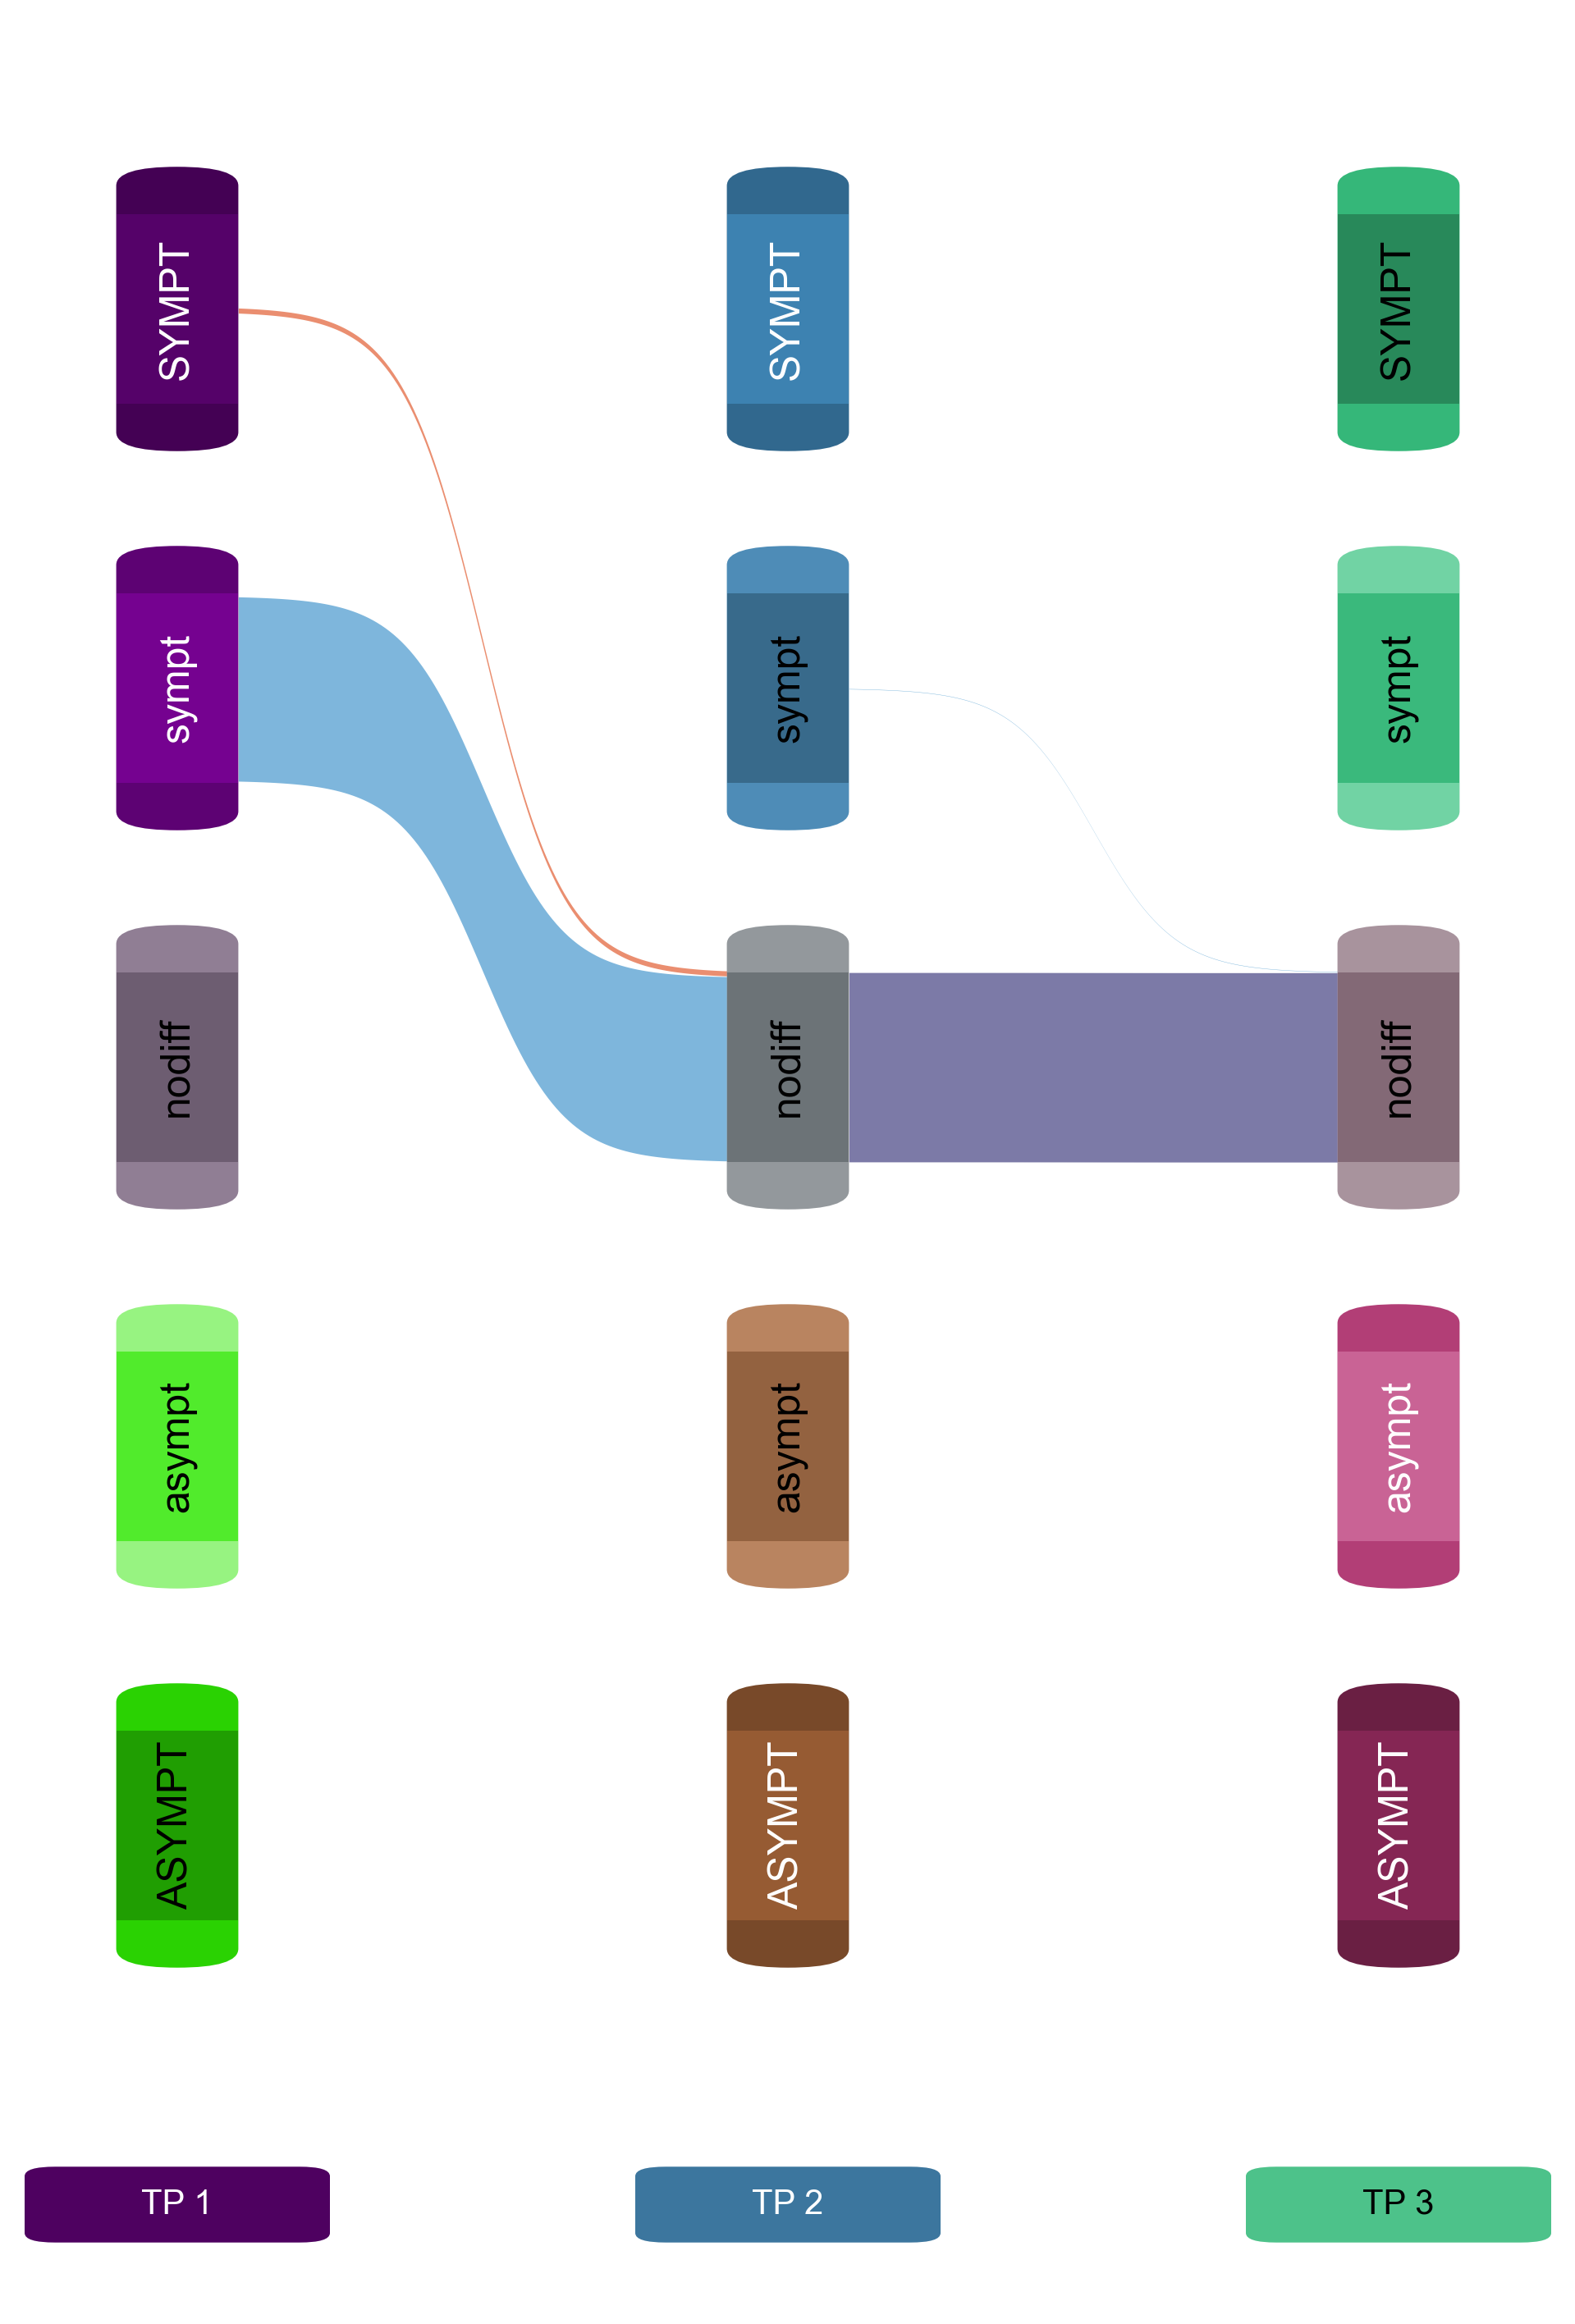

In [21]:
fa.plot_flows(use_edges=relEdgesSympt, seriesColors=sc, figsize=(8,12), outfile="plots/ddiff_flows_sympt_diverging", colorMode="diverging")

In [22]:
pwScoresAsymptGrp = fa.analyse_pathways(additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdgesAsympt)
pwScoresSymptGrp = fa.analyse_pathways(additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdgesSympt)

Loading pathways from ReactomePathways.gmt
Identified 2612 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, np.int64(2605)]
Loading pathways from ReactomePathways.gmt
Identified 2612 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, np.int64(2605)]


,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
2442,R-HSA-202430,Translocation of ZAP-70 to Immunological synapse,2.430285,26,23.437923,229.000003,5,0.093472,0.103690,0.009692,7.348884,9.993429e-14,2.612282e-10
1652,R-HSA-202427,Phosphorylation of CD3 and TCR zeta chains,2.430285,29,23.437923,229.000003,5,0.083803,0.103690,0.008690,6.546107,2.952804e-11,3.859315e-08
1569,R-HSA-389948,PD-1 signaling,2.430285,30,23.437923,229.000003,5,0.081009,0.103690,0.008400,6.314194,1.357863e-10,1.183151e-07
2612,ISG_SHORT,ISG_SHORT,1.216680,17,23.437923,229.000003,3,0.071569,0.051911,0.003715,5.530469,1.596880e-08,1.043561e-05
2613,ISG_LONG,ISG_LONG,1.928630,55,23.437923,229.000003,7,0.035066,0.082287,0.002885,4.591823,2.196957e-06,1.148569e-03
993,R-HSA-202433,Generation of second messenger molecules,2.430285,41,23.437923,229.000003,5,0.059275,0.103690,0.006146,4.509796,3.244494e-06,1.413518e-03
825,R-HSA-9634638,Estrogen-dependent nuclear events downstream o...,1.274579,24,23.437923,229.000003,4,0.053107,0.054381,0.002888,3.997742,3.197478e-05,1.044776e-02
392,R-HSA-388841,Costimulation by the CD28 family,2.430285,78,23.437923,229.000003,6,0.031157,0.103690,0.003231,4.012701,3.001401e-05,1.044776e-02
1525,R-HSA-198725,Nuclear Events (kinase and transcription facto...,1.847614,62,23.437923,229.000003,6,0.029800,0.078830,0.002349,3.811595,6.903650e-05,2.005127e-02
908,R-HSA-72689,Formation of a pool of free 40S subunits,2.657097,106,23.437923,229.000003,7,0.025067,0.113367,0.002842,3.780657,7.820749e-05,2.044344e-02


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(10, 14)


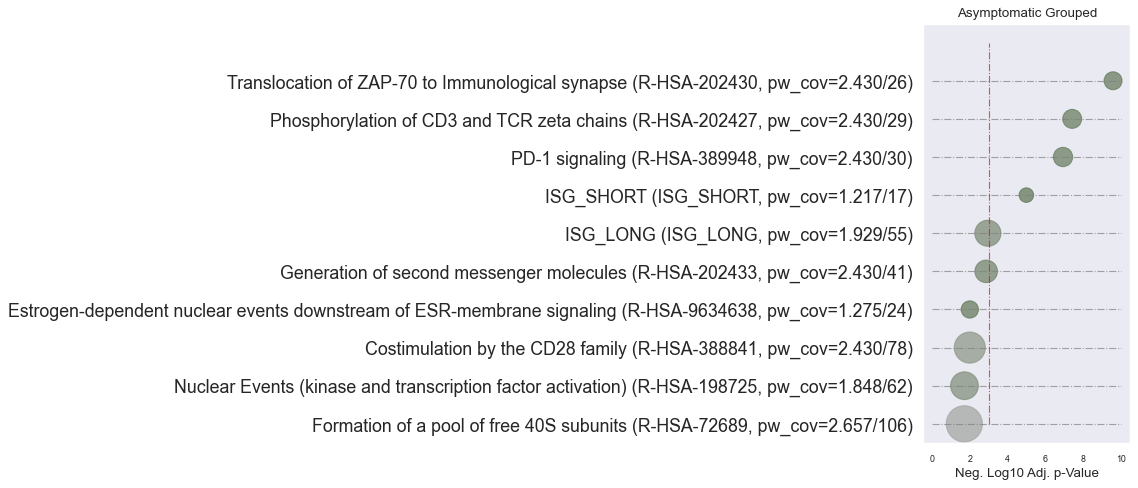

In [23]:
selPWsAsymptGrp = pwScoresAsymptGrp[(pwScoresAsymptGrp["pw_coverage_adj_pval"] < 0.2)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsAsymptGrp)
fa.plotORAresult(selPWsAsymptGrp, "Asymptomatic Grouped", numResults=10, figsize=(6,6), outfile="plots/ddiff_asympt_ra")

,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
2398,R-HSA-1679131,Trafficking and processing of endosomal TLR,1.269038,13,52.88324,229.000003,2,0.097618,0.023997,0.002343,6.060125,6.800772e-10,0.000002
2417,R-HSA-2173793,Transcriptional activity of SMAD2/SMAD3:SMAD4 ...,2.036551,51,52.88324,229.000003,5,0.039932,0.038510,0.001538,5.858686,2.332716e-09,0.000003
2184,R-HSA-9006936,Signaling by TGFB family members,2.458163,122,52.88324,229.000003,6,0.020149,0.046483,0.000937,4.464113,4.020055e-06,0.003503
169,R-HSA-2022090,Assembly of collagen fibrils and other multime...,1.724644,61,52.88324,229.000003,3,0.028273,0.032612,0.000922,3.917851,4.467092e-05,0.023354
1189,R-HSA-6785807,Interleukin-4 and Interleukin-13 signaling,2.037556,112,52.88324,229.000003,12,0.018192,0.038529,0.000701,3.924410,4.347123e-05,0.023354
751,R-HSA-2173795,Downregulation of SMAD2/3:SMAD4 transcriptiona...,2.036551,31,52.88324,229.000003,4,0.065695,0.038510,0.002530,3.837654,6.210767e-05,0.027058
702,R-HSA-2022923,Dermatan sulfate biosynthesis,0.714000,11,52.88324,229.000003,1,0.064909,0.013501,0.000876,3.782926,7.749769e-05,0.028940
1458,R-HSA-9024446,NR1H2 and NR1H3-mediated signaling,1.416515,54,52.88324,229.000003,3,0.026232,0.026786,0.000703,3.578092,1.730558e-04,0.056546
2411,R-HSA-8986944,Transcriptional Regulation by MECP2,1.628167,63,52.88324,229.000003,6,0.025844,0.030788,0.000796,3.513531,2.210963e-04,0.064216
178,R-HSA-9678110,Attachment and Entry_9678110,0.654222,11,52.88324,229.000003,1,0.059475,0.012371,0.000736,3.404588,3.313197e-04,0.086607


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(10, 14)


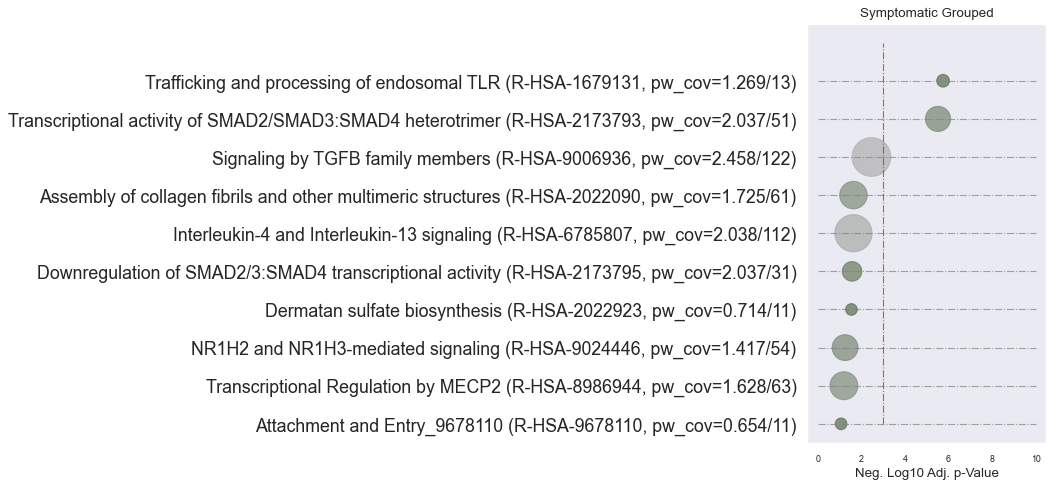

In [24]:
selPWsSymptGrp = pwScoresSymptGrp[(pwScoresSymptGrp["pw_coverage_adj_pval"] < 0.2)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsSymptGrp)
fa.plotORAresult(selPWsSymptGrp, "Symptomatic Grouped", numResults=10, figsize=(6, 6), outfile="plots/ddiff_sympt_ra")

In [25]:
pwScoresAsymptGrpGO = fa.analyse_pathways(genesets_file="go_human.bp.gmt", additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdgesAsympt)
pwScoresSymptGrpGO = fa.analyse_pathways(genesets_file="go_human.bp.gmt", additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdgesSympt)

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, np.int64(1226)]
Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, np.int64(1226)]


,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
5518,GO:0002503,peptide antigen assembly with MHC class II pro...,2.430285,16,23.437923,292.000003,5,0.151893,0.103690,0.015750,10.542598,2.747960e-26,3.445117e-22
12314,GO:0002381,immunoglobulin production involved in immunogl...,2.430285,17,23.437923,292.000003,5,0.142958,0.103690,0.014823,9.899078,2.100646e-23,1.316790e-19
5520,GO:0032831,"positive regulation of CD4-positive, CD25-posi...",1.067561,5,23.437923,292.000003,2,0.213512,0.045548,0.009725,6.952964,1.788452e-12,7.473943e-09
5516,GO:0002469,myeloid dendritic cell antigen processing and ...,1.067561,3,23.437923,292.000003,2,0.355854,0.045548,0.016209,6.559691,2.695969e-11,8.449840e-08
12536,ISG_LONG,ISG_LONG,1.928630,55,23.437923,292.000003,7,0.035066,0.082287,0.002885,6.059911,6.809832e-10,1.707497e-06
3401,GO:0140467,integrated stress response signaling,2.010772,24,23.437923,292.000003,5,0.083782,0.085791,0.007188,5.637037,8.650023e-09,1.807422e-05
3830,GO:0019886,antigen processing and presentation of exogeno...,2.430285,31,23.437923,292.000003,6,0.078396,0.103690,0.008129,5.249128,7.641048e-08,1.368512e-04
5522,GO:0045622,regulation of T-helper cell differentiation,1.067561,4,23.437923,292.000003,2,0.266890,0.045548,0.012156,5.049664,2.212944e-07,3.082631e-04
5523,GO:2000516,"positive regulation of CD4-positive, alpha-bet...",1.067561,4,23.437923,292.000003,3,0.266890,0.045548,0.012156,5.049664,2.212944e-07,3.082631e-04
365,GO:0050870,positive regulation of T cell activation,2.430285,33,23.437923,292.000003,5,0.073645,0.103690,0.007636,4.906924,4.625799e-07,5.384824e-04


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(15, 14)


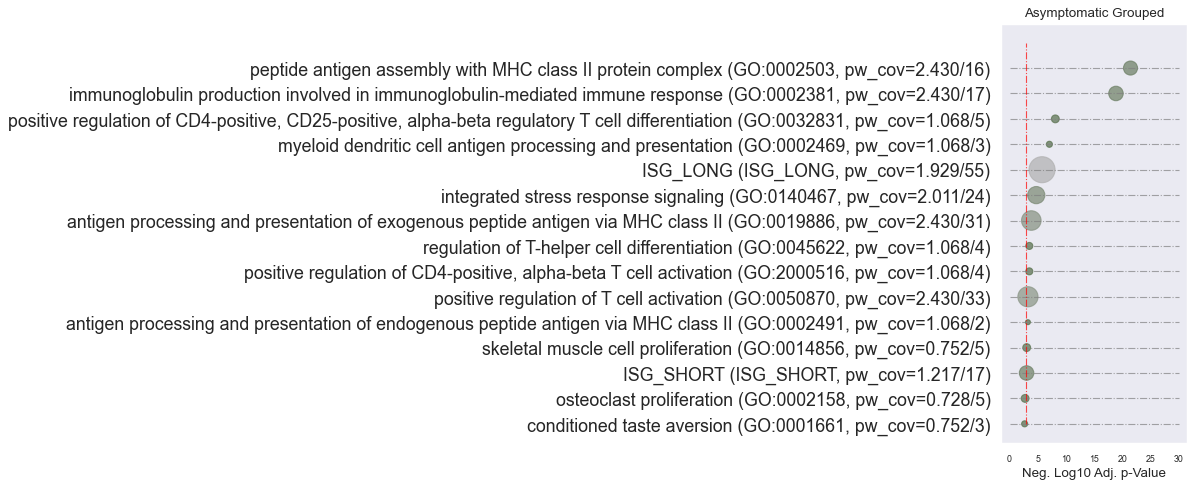

In [26]:
selPWsAsymptGrpGO = pwScoresAsymptGrpGO[(pwScoresAsymptGrpGO["pw_coverage_adj_pval"] < 0.2)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsAsymptGrpGO)
fa.plotORAresult(selPWsAsymptGrpGO, "Asymptomatic Grouped", numResults=15, figsize=(6, 6), outfile="plots/ddiff_asympt_go")

In [27]:
text = "Lorem Ipsum"
f"{text:.5}"

'Lorem'

,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
5518,GO:0002503,peptide antigen assembly with MHC class II pro...,2.430285,16,23.437923,292.000003,5,0.151893,0.103690,0.015750,10.542598,2.747960e-26,3.445117e-22
12314,GO:0002381,immunoglobulin production involved in immunogl...,2.430285,17,23.437923,292.000003,5,0.142958,0.103690,0.014823,9.899078,2.100646e-23,1.316790e-19
5520,GO:0032831,"positive regulation of CD4-positive, CD25-posi...",1.067561,5,23.437923,292.000003,2,0.213512,0.045548,0.009725,6.952964,1.788452e-12,7.473943e-09
5516,GO:0002469,myeloid dendritic cell antigen processing and ...,1.067561,3,23.437923,292.000003,2,0.355854,0.045548,0.016209,6.559691,2.695969e-11,8.449840e-08
12536,ISG_LONG,ISG_LONG,1.928630,55,23.437923,292.000003,7,0.035066,0.082287,0.002885,6.059911,6.809832e-10,1.707497e-06
3401,GO:0140467,integrated stress response signaling,2.010772,24,23.437923,292.000003,5,0.083782,0.085791,0.007188,5.637037,8.650023e-09,1.807422e-05
3830,GO:0019886,antigen processing and presentation of exogeno...,2.430285,31,23.437923,292.000003,6,0.078396,0.103690,0.008129,5.249128,7.641048e-08,1.368512e-04
5522,GO:0045622,regulation of T-helper cell differentiation,1.067561,4,23.437923,292.000003,2,0.266890,0.045548,0.012156,5.049664,2.212944e-07,3.082631e-04
5523,GO:2000516,"positive regulation of CD4-positive, alpha-bet...",1.067561,4,23.437923,292.000003,3,0.266890,0.045548,0.012156,5.049664,2.212944e-07,3.082631e-04
365,GO:0050870,positive regulation of T cell activation,2.430285,33,23.437923,292.000003,5,0.073645,0.103690,0.007636,4.906924,4.625799e-07,5.384824e-04


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(15, 14)


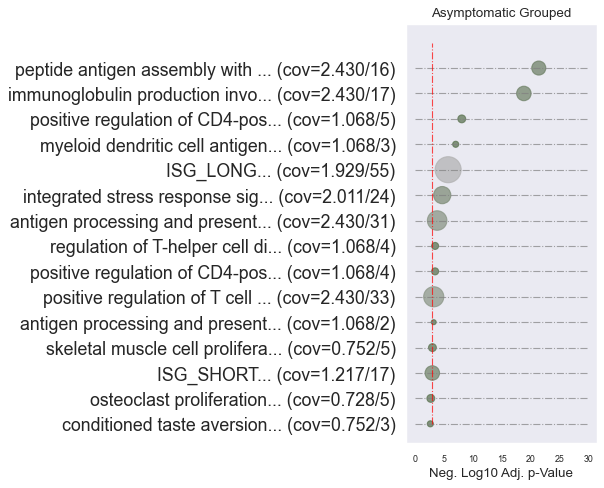

In [28]:
selPWsAsymptGrpGO = pwScoresAsymptGrpGO[(pwScoresAsymptGrpGO["pw_coverage_adj_pval"] < 0.2)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsAsymptGrpGO)
fa.plotORAresult(selPWsAsymptGrpGO, "Asymptomatic Grouped", numResults=15, figsize=(4,6), outfile="plots/ddiff_asympt_go2", entryformat="{x:.30}...{sep}(cov={z:.3f}/{s})")

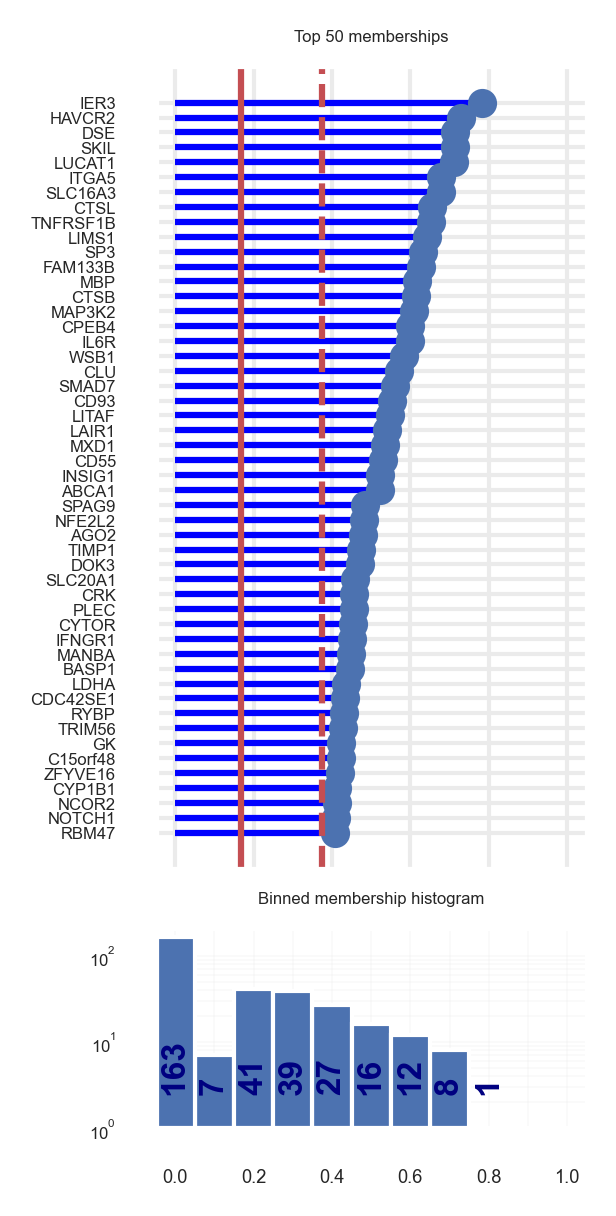

In [29]:
memdf,_,_ = fa.plot_flow_memberships(relEdgesSympt, n_genes=50, figsize=(2,4), outfile="plots/sympt_pattern_genememberships")

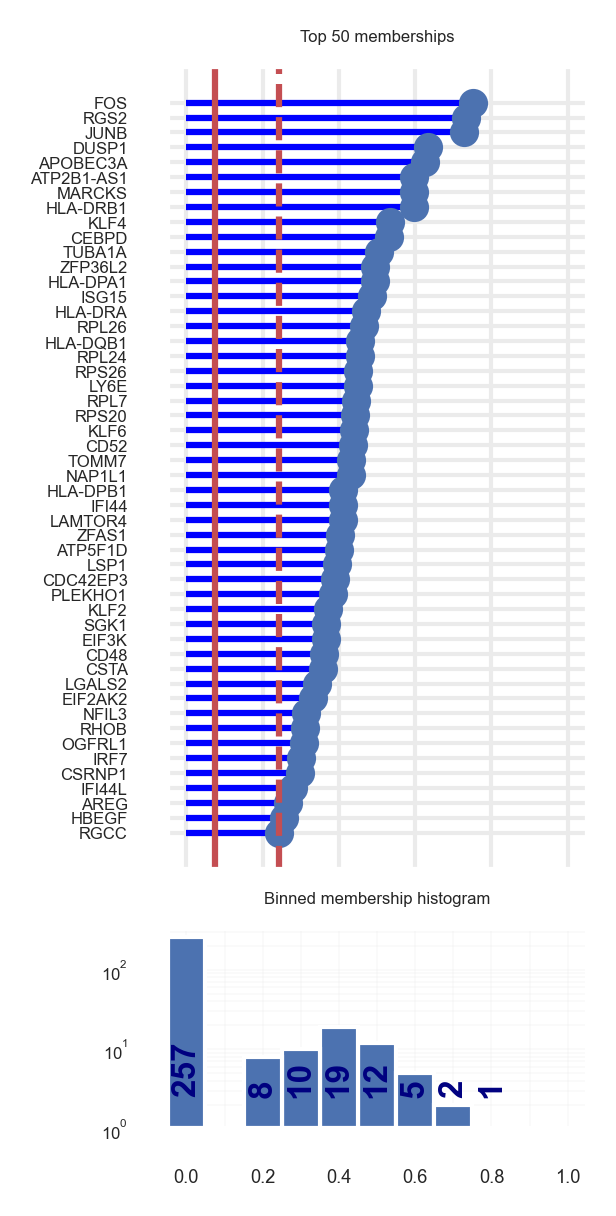

In [30]:
memdf,_,_ = fa.plot_flow_memberships(relEdgesAsympt, n_genes=50, figsize=(2,4), outfile="plots/asympt_patterN_genememberships")

,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
4332,GO:0010614,negative regulation of cardiac muscle hypertrophy,1.403470,13,52.88324,292.000003,5,0.107959,0.026539,0.002865,5.797814,3.359246e-09,0.000042
2374,GO:0034616,response to laminar fluid shear stress,1.083000,5,52.88324,292.000003,2,0.216600,0.020479,0.004436,4.809798,7.554134e-07,0.003157
1130,GO:0046718,viral entry into host cell,2.873173,101,52.88324,292.000003,7,0.028447,0.054331,0.001546,4.828559,6.876231e-07,0.003157
7558,GO:1902339,positive regulation of apoptotic process invol...,1.403470,3,52.88324,292.000003,3,0.467823,0.026539,0.012416,4.458775,4.121466e-06,0.010334
7557,GO:0003332,negative regulation of extracellular matrix co...,1.403470,4,52.88324,292.000003,3,0.350868,0.026539,0.009312,4.482473,3.689150e-06,0.010334
6042,GO:0150077,regulation of neuroinflammatory response,0.940523,11,52.88324,292.000003,3,0.085502,0.017785,0.001521,4.398067,5.460958e-06,0.011411
6984,GO:0003176,aortic valve development,0.993774,5,52.88324,292.000003,2,0.198755,0.018792,0.003735,4.335555,7.269632e-06,0.013020
6288,GO:0097067,cellular response to thyroid hormone stimulus,1.269038,16,52.88324,292.000003,2,0.079315,0.023997,0.001903,4.012422,3.004944e-05,0.047091
2495,GO:1905907,negative regulation of amyloid fibril formation,0.965596,13,52.88324,292.000003,2,0.074277,0.018259,0.001356,3.698390,1.084856e-04,0.134629
868,GO:1901224,positive regulation of NIK/NF-kappaB signaling,2.141188,66,52.88324,292.000003,7,0.032442,0.040489,0.001314,3.676726,1.181235e-04,0.134629


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(15, 14)


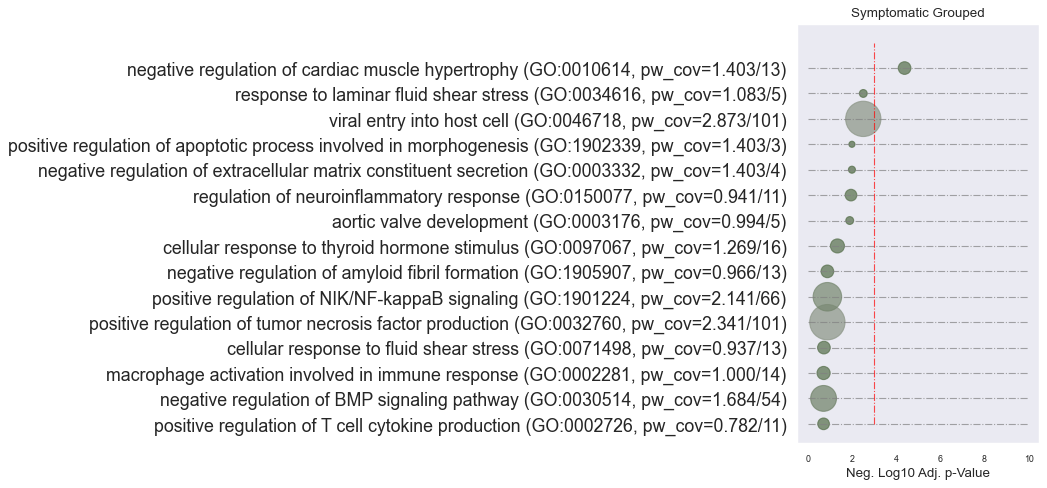

In [31]:
selPWsSymptGrpGO = pwScoresSymptGrpGO[(pwScoresSymptGrpGO["pw_coverage_adj_pval"] < 1)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsSymptGrpGO)
fa.plotORAresult(selPWsSymptGrpGO, "Symptomatic Grouped", numResults=15, figsize=(6,6), outfile="plots/ddiff_sympt_go")